<a href="https://colab.research.google.com/github/kamjelonek/Project_2_CLASS/blob/main/driver_EEG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
from sklearn.model_selection import learning_curve, train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,precision_score,recall_score,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier

In [68]:
df = pd.read_csv('acquiredDataset.csv')
df.head()

# Attenction - Proprietary measure of mental focus from 0-100
# meditation - Proprietary measure of calmness from 0-100
# delta - 1-3 Hz of power spectrum
# theta - 4-7 Hz of power spectrum
# lowAlpha - Lower 8-11 Hz of power spectrum
# highAlpha - Higher 8-11 Hz of power spectrum
# lowBeta - Lower 12-29 Hz of power spectrum
# highBeta - Higher 12-29 Hz of power spectrum
# lowGamma - Lower 30-100 Hz of power spectrum
# highGamma - Higher 30-100 Hz of power spectrum
# classification - (0-yes/1-no? guess)

attention  meditation   delta   theta  lowAlpha  highAlpha  lowBeta  \
0         26          34  960462  277180     26575      27356    26575   
1         29          54   39145   28225     20172      39551    20172   
2         40          48   75410   43144      8601      13564     8601   
3         66          47   16057   41211      2534      34254     2534   
4         81          67   10304   47239     33158      47349    33158   

   highBeta  lowGamma  highGamma  classification  
0     13056      9126       2683               0  
1      9933      5237       4750               0  
2     11663      2515       3251               0  
3     27663     11396       2825               0  
4     16328      5298       5471               0

In [69]:
df.shape

(3735, 11)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3735 entries, 0 to 3734
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   attention       3735 non-null   int64
 1   meditation      3735 non-null   int64
 2   delta           3735 non-null   int64
 3   theta           3735 non-null   int64
 4   lowAlpha        3735 non-null   int64
 5   highAlpha       3735 non-null   int64
 6   lowBeta         3735 non-null   int64
 7   highBeta        3735 non-null   int64
 8   lowGamma        3735 non-null   int64
 9   highGamma       3735 non-null   int64
 10  classification  3735 non-null   int64
dtypes: int64(11)
memory usage: 321.1 KB


In [71]:
df['classification'].unique()

array([0, 1])

In [72]:
print('Duplicate rows:')
print(df.duplicated().sum())

Duplicate rows:
0


In [73]:
df.nunique()


attention           60
meditation          60
delta             3724
theta             3680
lowAlpha          3601
highAlpha         3561
lowBeta           3573
highBeta          3494
lowGamma          3259
highGamma         3651
classification       2
dtype: int64

In [74]:
nany = df.isna().sum()
print("Liczba brakujących wartości:")
print(nany)

Liczba brakujących wartości:
attention         0
meditation        0
delta             0
theta             0
lowAlpha          0
highAlpha         0
lowBeta           0
highBeta          0
lowGamma          0
highGamma         0
classification    0
dtype: int64


In [75]:
df.corr()

attention  meditation     delta     theta  lowAlpha  \
attention        1.000000    0.012465 -0.142241 -0.053082 -0.051414   
meditation       0.012465    1.000000 -0.075071 -0.081029  0.159976   
delta           -0.142241   -0.075071  1.000000  0.380921  0.363079   
theta           -0.053082   -0.081029  0.380921  1.000000  0.456296   
lowAlpha        -0.051414    0.159976  0.363079  0.456296  1.000000   
highAlpha        0.047367    0.015013  0.257987  0.656068  0.256059   
lowBeta          0.006725    0.009094  0.349557  0.344237  0.693183   
highBeta         0.166178    0.027394  0.225820  0.663608  0.437718   
lowGamma         0.059002   -0.097699  0.253741  0.285673  0.294094   
highGamma        0.032169    0.166853  0.287873  0.594448  0.444335   
classification   0.049283   -0.057642 -0.229921 -0.205588 -0.174786   

                highAlpha   lowBeta  highBeta  lowGamma  highGamma  \
attention        0.047367  0.006725  0.166178  0.059002   0.032169   
meditation       0.015013  0.009094  0.027394 -0.097699   0.166853   
delta            0.257987  0.349557  0.225820  0.253741   0.287873   
theta            0.656068  0.344237  0.663608  0.285673   0.594448   
lowAlpha         0.256059  0.693183  0.437718  0.294094   0.444335   
highAlpha        1.000000  0.271657  0.632582  0.281427   0.469033   
lowBeta          0.271657  1.000000  0.199992  0.403545   0.182727   
highBeta         0.632582  0.199992  1.000000  0.301577   0.650842   
lowGamma         0.281427  0.403545  0.301577  1.000000   0.027007   
highGamma        0.469033  0.182727  0.650842  0.027007   1.000000   
classification  -0.190926 -0.063340 -0.213560 -0.049076  -0.103819   

                classification  
attention             0.049283  
meditation           -0.057642  
delta                -0.229921  
theta                -0.205588  
lowAlpha             -0.174786  
highAlpha            -0.190926  
lowBeta              -0.063340  
highBeta             -0.213560  
lowGamma             -0.049076  
highGamma            -0.103819  
classification        1.000000

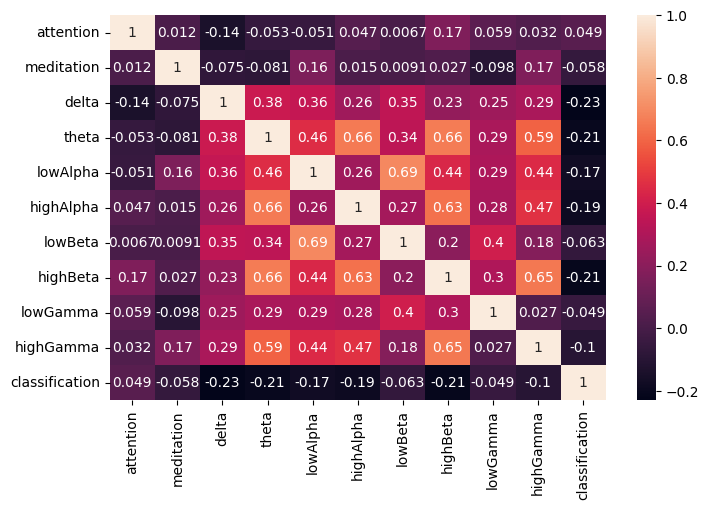

In [76]:
plt.figure(figsize=(8, 5))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [77]:
#from pandas.profiling import ProfileReport

In [78]:
#profile = ProfileReport(df)
#profile

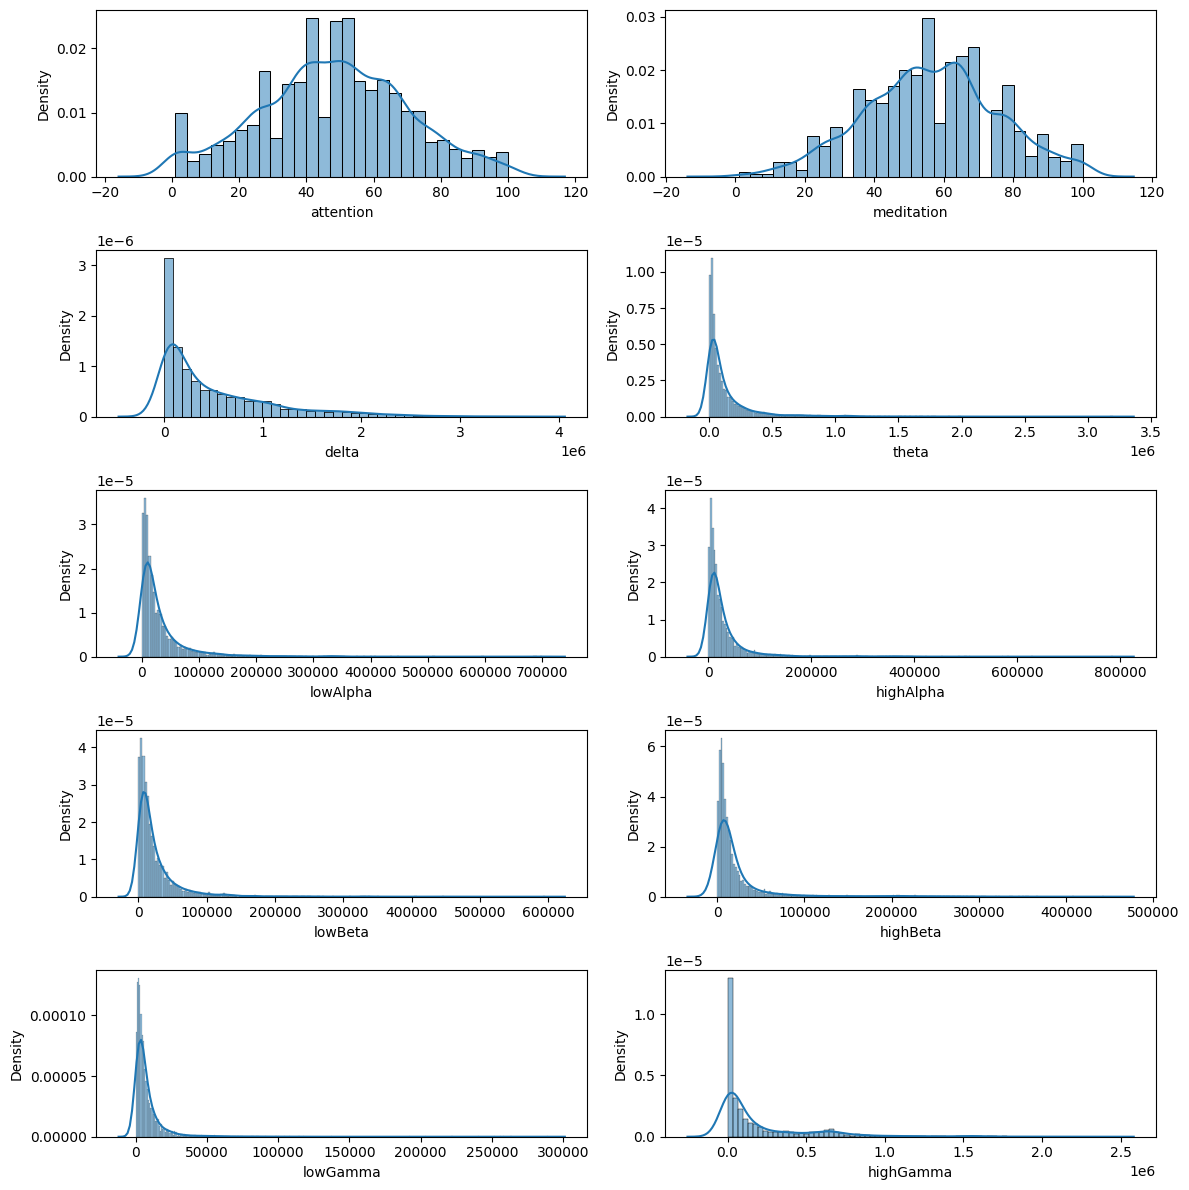

In [79]:
cols = list(df.columns)[0:len(df.columns)-1]
rows_plot = 5
cols_plot = 2
counter = 1
plt.rcParams["figure.figsize"] = [12, 12]
for col in cols:
    plt.subplot(rows_plot, cols_plot, counter)
    sns.histplot(df[col], kde=True, stat="density", kde_kws=dict(cut=4))
    counter += 1
plt.tight_layout()
plt.show()

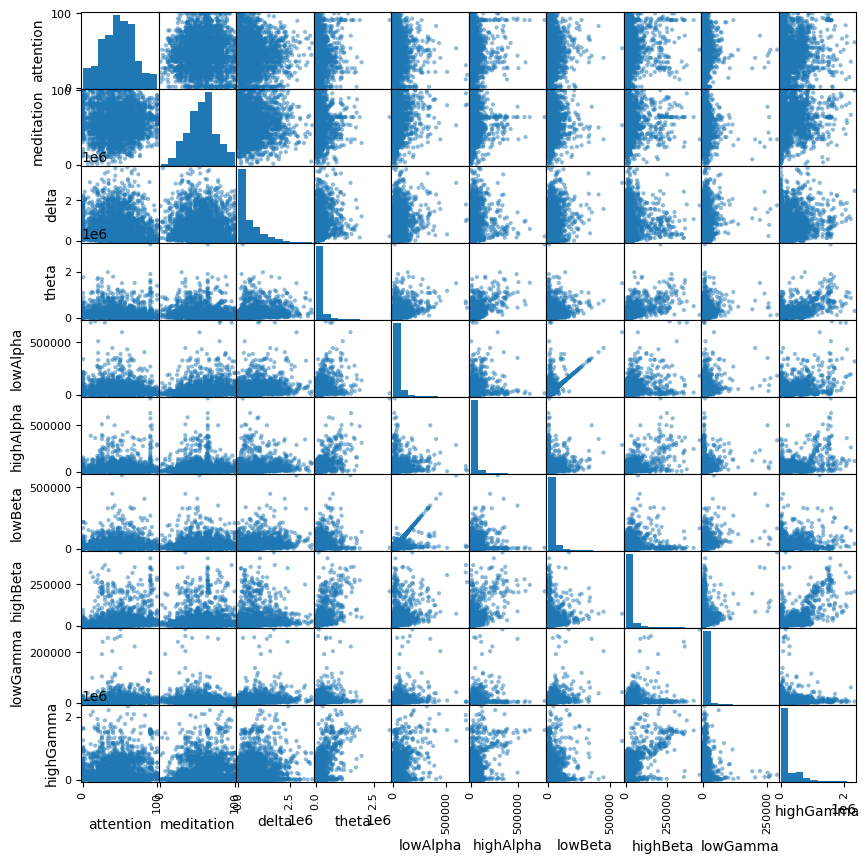

In [80]:
scatter_matrix(df.drop(columns = ["classification"]), figsize=(10, 10))
plt.show()

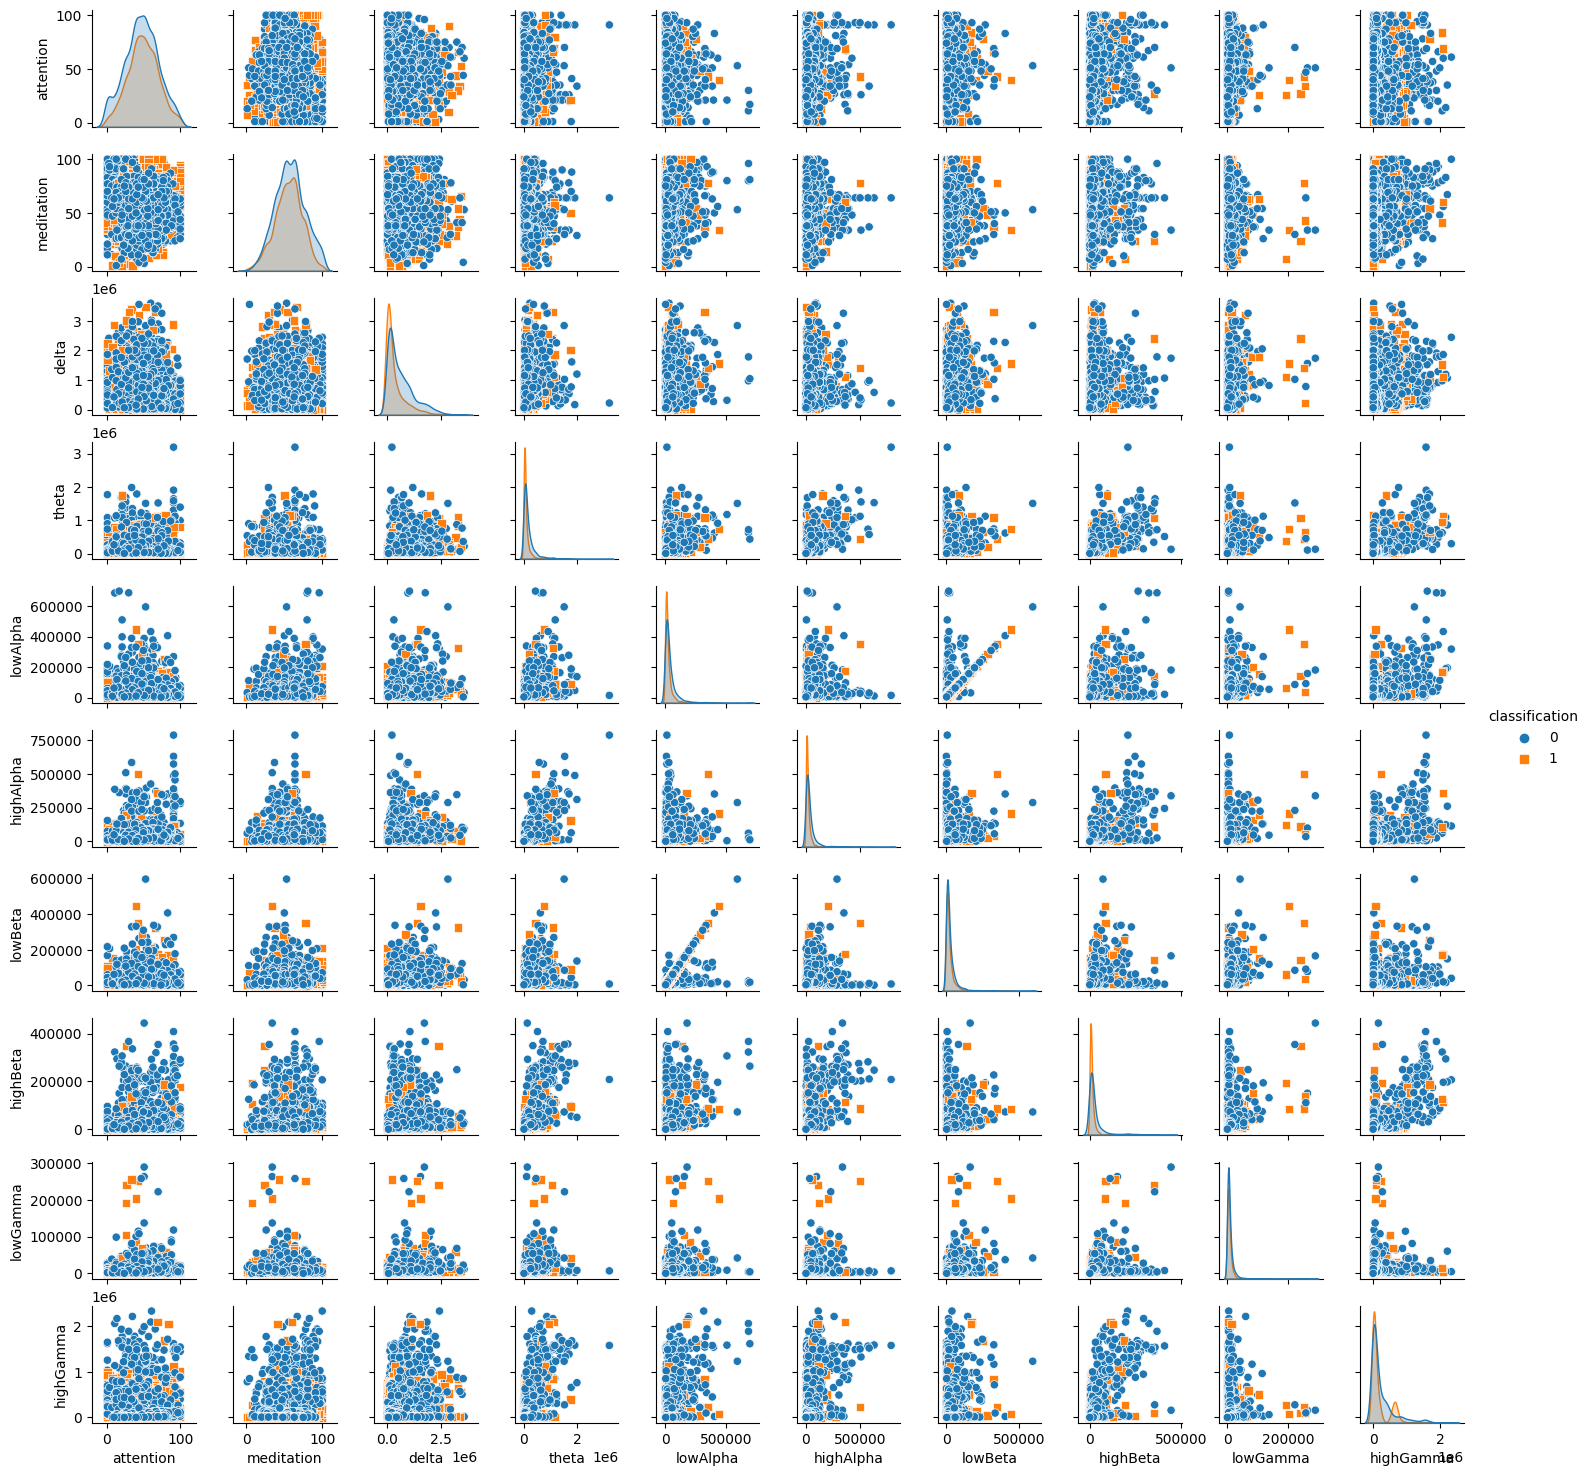

In [81]:
_ = sns.pairplot(df, hue='classification', diag_kind='kde', markers=['o', 's'], height=1.5, aspect=1)

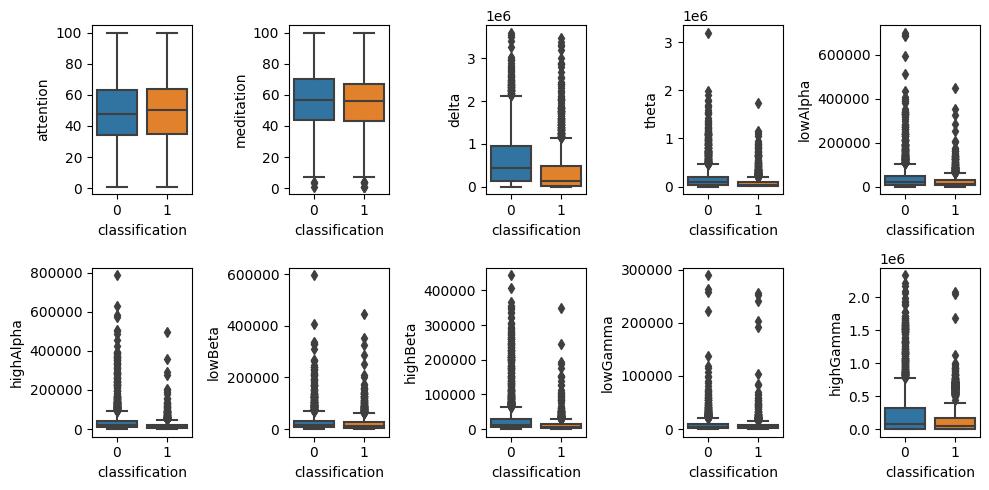

In [82]:
rows_plot=2
cols_plot=5
counter=1
plt.rcParams['figure.figsize']=[10,5]
for col in cols:
    plt.subplot(rows_plot,cols_plot,counter)
    sns.boxplot(x='classification',y=col,data=df)
    counter+=1

plt.tight_layout()
plt.show()

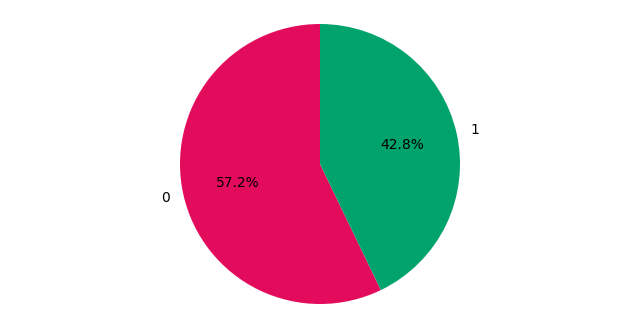

In [83]:
plt.figure(figsize=(8, 4))
plt.pie(df['classification'].value_counts(), labels=['0', '1'], autopct='%1.1f%%', startangle=90, colors = ['#E30B5C', '#00A36C'])
plt.axis('equal')
plt.show()

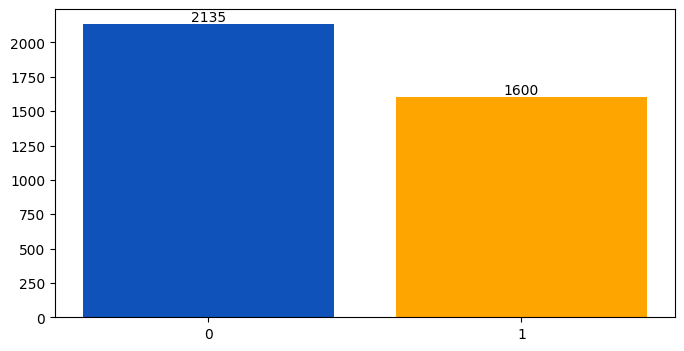

In [84]:
plt.figure(figsize=(8, 4))
ax = plt.gca()
bars = plt.bar(['0', '1'], df['classification'].value_counts(), color=['#0F52BA', 'orange'])

for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{int(height)}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 0),
                textcoords="offset points", ha='center', va='bottom')

# Selekcja modeli

In [85]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import ADASYN

ada = ADASYN(sampling_strategy='minority', random_state=42)

X = df.drop(columns = ['classification'])
y = df['classification']

X_resampled_s, y_resampled_s = ada.fit_resample(X,y)

X_trainval, X_test, y_trainval, y_test = train_test_split(X_resampled_s, y_resampled_s, test_size=0.15, stratify=y_resampled_s, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.15, stratify=y_trainval, random_state=42)

model_knn = KNeighborsClassifier()
model_svc = SVC(random_state=42)
model_tree = DecisionTreeClassifier(random_state=42)
model_rf = RandomForestClassifier(random_state=42)
model_logreg = LogisticRegression(random_state=42)
model_logregCV = LogisticRegressionCV(random_state=42)
model_brf = GradientBoostingClassifier(random_state=42)
model_gauss = GaussianNB()
model_mlp = MLPClassifier(random_state=42)

models = {0: model_knn,
          1: model_svc,
          2: model_tree,
          3: model_rf,
          4: model_brf,
          5: model_logreg,
          6: model_logregCV,
          7: model_gauss,
          8: model_mlp}

results = {"model": [],
           "accuracy": [],
           "precision": [],
           "recall": [],
           "f1-score (macro)": [],
           "mcc-score": []}

matrixs = []

for m in range(len(models)):
  models[m].fit(X_train,y_train)
  y_pred = models[m].predict(X_val)
  results["model"].append(models[m])
  results["accuracy"].append(accuracy_score(y_val,y_pred))
  results["precision"].append(precision_score(y_val,y_pred))
  results["recall"].append(recall_score(y_val,y_pred))
  results["f1-score (macro)"].append(f1_score(y_val,y_pred,average="macro"))
  results["mcc-score"].append(matthews_corrcoef(y_val,y_pred))
  matrixs.append(confusion_matrix(y_val,y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

model  accuracy  precision  \
0                             KNeighborsClassifier()  0.674545   0.653251   
1                               SVC(random_state=42)  0.616364   0.624535   
2            DecisionTreeClassifier(random_state=42)  0.736364   0.743590   
3  (DecisionTreeClassifier(max_features='sqrt', r...  0.807273   0.790541   
4  ([DecisionTreeRegressor(criterion='friedman_ms...  0.740000   0.722772   
5                LogisticRegression(random_state=42)  0.629091   0.660870   
6              LogisticRegressionCV(random_state=42)  0.663636   0.656566   
7                                       GaussianNB()  0.574545   0.547210   
8                     MLPClassifier(random_state=42)  0.610909   0.735294   

     recall  f1-score (macro)  mcc-score  
0  0.758993          0.671723   0.352620  
1  0.604317          0.616352   0.233035  
2  0.730216          0.736363   0.472847  
3  0.841727          0.806905   0.615546  
4  0.787770          0.739171   0.481420  
5  0.546763          0.626915   0.263535  
6  0.701439          0.662940   0.327469  
7  0.917266          0.514090   0.196710  
8  0.359712          0.585569   0.263481

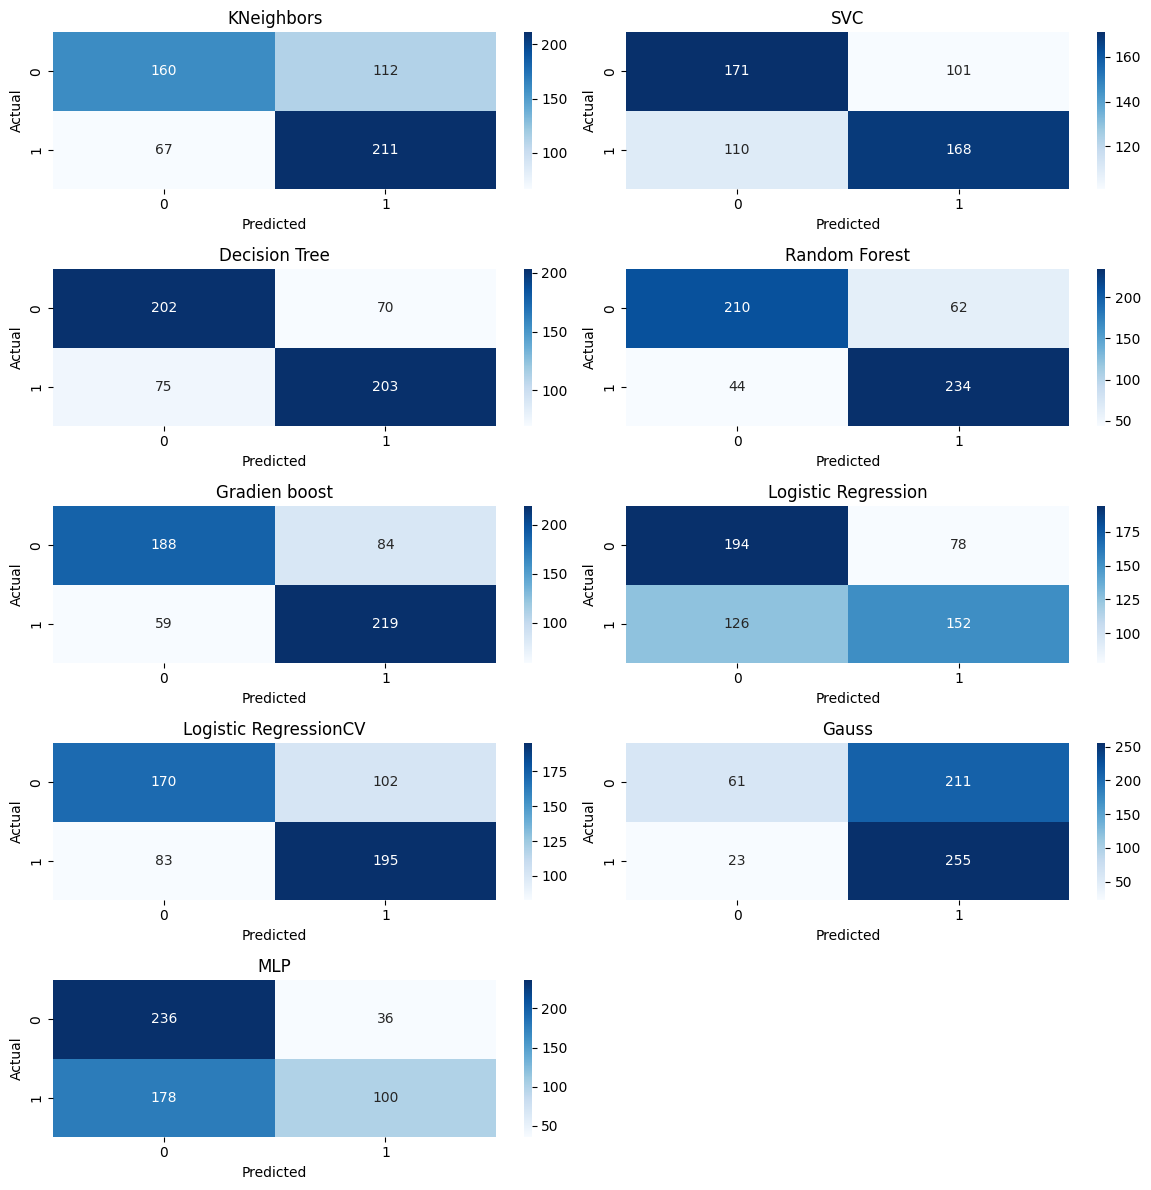

In [86]:
df_results = pd.DataFrame(results)
display(df_results)

titles = {1: "KNeighbors",
          2: "SVC",
          3: "Decision Tree",
          4: "Random Forest",
          5: "Gradien boost",
          6: "Logistic Regression",
          7: "Logistic RegressionCV",
          8: "Gauss",
          9: "MLP"}

rows_plot = 5
cols_plot = 2
counter = 0
plt.rcParams["figure.figsize"] = [12, 12]
for matrix in matrixs:
    counter += 1
    plt.subplot(rows_plot, cols_plot, counter)
    sns.heatmap(matrix, annot=True, cmap='Blues', fmt='g')
    plt.title(titles[counter])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
plt.show()

# KNN

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


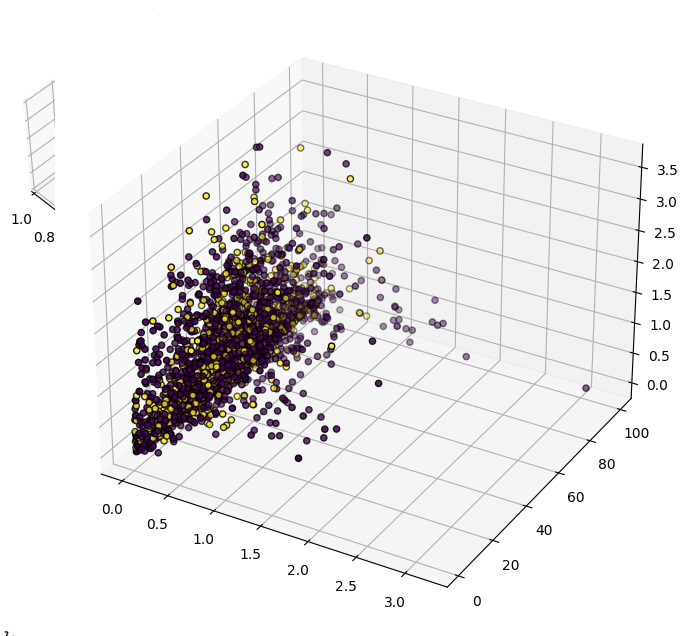

In [87]:
from imblearn.over_sampling import KMeansSMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

km = KMeansSMOTE(random_state=42)

params = {"n_neighbors": [3,5,7,9,11],
          "algorithm": ["ball_tree","kd_tree","brute"],
          "leaf_size": [15,30,45],
          "p": [1,2]}

gs = GridSearchCV(KNeighborsClassifier(),
                  param_grid=params,
                  cv=10,
                  scoring="f1_macro")

X_res, y_res = km.fit_resample(X,y)

X_trainval, X_test, y_trainval, y_test = train_test_split(X_res, y_res, test_size=0.15, stratify=y_res, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.15, stratify=y_trainval, random_state=42)

gs.fit(X_train,y_train)

X_show = np.array(X_res)
y_show = np.array(y_res)

fig = plt.figure(figsize=(10, 8))

ax = fig.add_subplot(2, 2, 1, projection="3d", elev=48, azim=134)

ax = plt.axes(projection='3d')
ax.scatter3D(X_show[:, 3], X_show[:, 0], X_show[:, 2],c=y_show, edgecolor="k")

Accuracy score: 0.7761467889908257
Precision score: 0.8073770491803278
Recall score: 0.7242647058823529
matt_score: 0.5551471842852159
              precision    recall  f1-score   support

           0       0.75      0.83      0.79       273
           1       0.81      0.72      0.76       272

    accuracy                           0.78       545
   macro avg       0.78      0.78      0.78       545
weighted avg       0.78      0.78      0.78       545



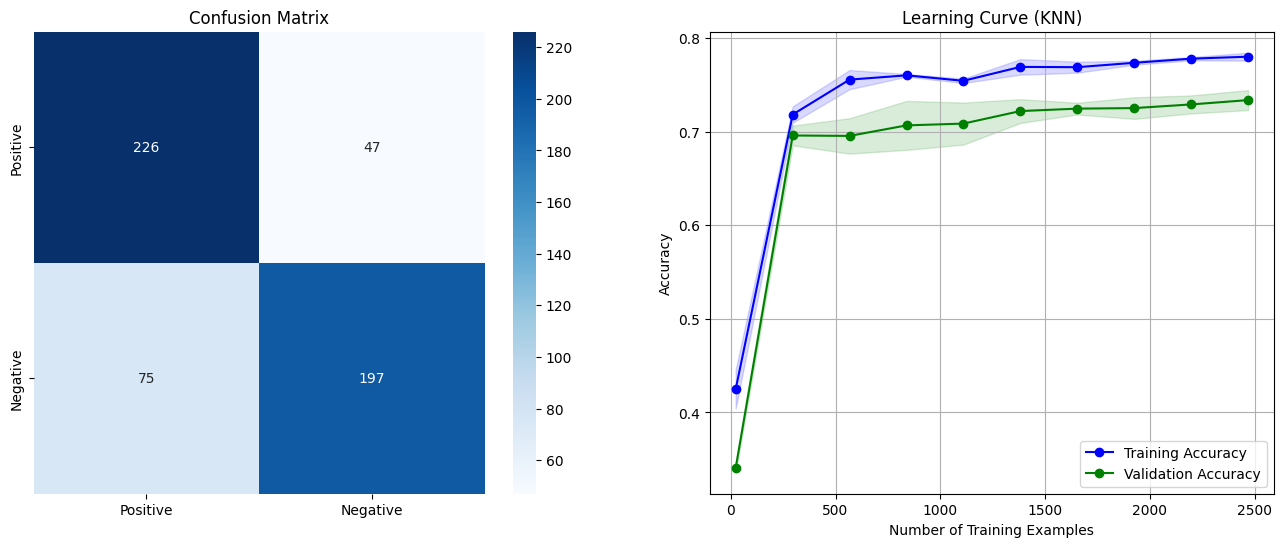

In [88]:
model_kn = KNeighborsClassifier(n_neighbors=gs.best_params_["n_neighbors"],
                                algorithm=gs.best_params_["algorithm"],
                                leaf_size=gs.best_params_["leaf_size"],
                                p=gs.best_params_["p"])

model_kn.fit(X_train, y_train)

y_pred_kn = model_kn.predict(X_val)

print(f"Accuracy score: {accuracy_score(y_val,y_pred_kn)}")
print(f"Precision score: {precision_score(y_val,y_pred_kn)}")
print(f"Recall score: {recall_score(y_val,y_pred_kn)}")
print(f"matt_score: {matthews_corrcoef(y_val,y_pred_kn)}")
matrix = confusion_matrix(y_val,y_pred_kn)

print(classification_report(y_val,y_pred_kn))

train_sizes, train_scores, test_scores = learning_curve(model_kn,X_train, y_train,
                                                        cv=10, scoring='f1_macro',
                                                        train_sizes=np.linspace(0.01, 1.0, 10))

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16,6))

sns.heatmap(matrix, annot=True, cmap='Blues', fmt='g', ax=ax1,
            xticklabels=["Positive","Negative"],
            yticklabels=["Positive","Negative"])
ax1.set_title("Confusion Matrix")

ax2.plot(train_sizes, train_mean, label='Training Accuracy', marker='o', color='blue')
ax2.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
ax2.plot(train_sizes, test_mean, label='Validation Accuracy', marker='o', color='green')
ax2.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15, color='green')
ax2.set_title('Learning Curve (KNN)')
ax2.set_xlabel('Number of Training Examples')
ax2.set_ylabel('Accuracy')
ax2.legend(loc='lower right')
ax2.grid(True)

plt.show()

## LOGISTIC REGRESSION

In [ ]:
from sklearn.preprocessing import MinMaxScaler,RobustScaler,PolynomialFeatures,MaxAbsScaler,Normalizer,QuantileTransformer,SplineTransformer, StandardScaler, PowerTransformer
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

print("y_trainval == 1: {}\ny_trainval == 0: {}".format((y_train == 1).sum(),(y_train == 0).sum()))

scaler_mms = MinMaxScaler()
scaler_ss = StandardScaler()
scaler_rs = RobustScaler()
scaler_poly = PolynomialFeatures()
scaler_gauss = PowerTransformer()
scaler_abs = MaxAbsScaler()
scaler_norm = Normalizer()
scaler_quant = QuantileTransformer()
scaler_spline = SplineTransformer()

model_knn = KNeighborsClassifier()
model_svc = SVC()
model_tree = DecisionTreeClassifier()
model_rf = RandomForestClassifier()
model_logreg = LogisticRegression()
model_logregCV = LogisticRegressionCV()
model_brf = GradientBoostingClassifier()
model_gauss = GaussianNB()
model_mlp = MLPClassifier()

scalers = {0: None,
           1: scaler_mms,
           2: scaler_ss,
           3: scaler_rs,
           4: scaler_poly,
           5: None,
           6: scaler_abs,
           7: scaler_norm,
           8: scaler_quant,
           9: scaler_spline}

models = {0: model_knn,
          1: model_svc,
          2: model_tree,
          3: model_rf,
          4: model_brf,
          5: model_logreg,
          6: model_logregCV,
          7: model_gauss,
          8: model_mlp}

# Wstępny GirdSearch

grid_search = {0: {"n_neighbors": [2,7]},
               1: {"C": [0.1,10],
                   "gamma": [0.1,10]},
               2: {"max_depth": [3,12]},
               3: None,
               4: None,
               5: {"C": [0.1,10]},
               6: {"Cs": [5,15],
                   "intercept_scaling": [0.5,2.0],
                   "scoring": ["f1"]},
               7: {"var_smoothing": [1e-10,1e-9,1e-8]},
               8: None}

results = {"model": [],
           "scaler": [],
           "precision": [],
           "recall": [],
           "f1-score (macro)": [],
           "accuracy": [],
           "params": [],
           "f1-gs (macro)": []}

class_report = []

for x in range(len(scalers)):
  if scalers[x] == None:
    X_train_embedded = X_train
    X_val_embedded = X_test
  else:
    print(x)
    X_train_embedded=scalers[x].fit_transform(X_train)
    X_val_embedded=scalers[x].transform(X_test)
  for y in range(len(models)):
    models[y].fit(X_train_embedded,y_train)

    if grid_search[y] != None:
      gs = GridSearchCV(models[y],
                        param_grid=grid_search[y],
                        scoring="f1_macro",
                        cv=10)
      gs.fit(X_train_embedded,y_train)
      results["params"].append(gs.best_params_)
      results["f1-gs (macro)"].append(gs.best_score_)
    else:
      results["params"].append(None)
      results["f1-gs (macro)"].append(None)

    y_pred = models[y].predict(X_val_embedded)
    results["model"].append(models[y])
    results["scaler"].append(scalers[x])
    results["precision"].append(precision_score(y_test,y_pred))
    results["recall"].append(recall_score(y_test,y_pred))
    results["f1-score (macro)"].append(f1_score(y_test,y_pred,average="macro"))
    results["accuracy"].append(accuracy_score(y_test,y_pred))
    class_report.append(classification_report(y_test,y_pred))


y_trainval == 1: 1280
y_trainval == 0: 1708


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

1


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


2


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


3


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


4


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

6


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


7


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

8


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


9


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [ ]:
results = pd.DataFrame(results)

pd.set_option('display.max_rows',len(results))
results_rounded = results.applymap(lambda x: round(x, 2) if isinstance(x, (int,float)) else x)

display(results_rounded)

model                 scaler  \
0                              KNeighborsClassifier()                   None   
1                                               SVC()                   None   
2                            DecisionTreeClassifier()                   None   
3   (DecisionTreeClassifier(max_features='sqrt', r...                   None   
4   ([DecisionTreeRegressor(criterion='friedman_ms...                   None   
5                                LogisticRegression()                   None   
6                              LogisticRegressionCV()                   None   
7                                        GaussianNB()                   None   
8                                     MLPClassifier()                   None   
9                              KNeighborsClassifier()         MinMaxScaler()   
10                                              SVC()         MinMaxScaler()   
11                           DecisionTreeClassifier()         MinMaxScaler()   
12  (DecisionTreeClassifier(max_features='sqrt', r...         MinMaxScaler()   
13  ([DecisionTreeRegressor(criterion='friedman_ms...         MinMaxScaler()   
14                               LogisticRegression()         MinMaxScaler()   
15                             LogisticRegressionCV()         MinMaxScaler()   
16                                       GaussianNB()         MinMaxScaler()   
17                                    MLPClassifier()         MinMaxScaler()   
18                             KNeighborsClassifier()       StandardScaler()   
19                                              SVC()       StandardScaler()   
20                           DecisionTreeClassifier()       StandardScaler()   
21  (DecisionTreeClassifier(max_features='sqrt', r...       StandardScaler()   
22  ([DecisionTreeRegressor(criterion='friedman_ms...       StandardScaler()   
23                               LogisticRegression()       StandardScaler()   
24                             LogisticRegressionCV()       StandardScaler()   
25                                       GaussianNB()       StandardScaler()   
26                                    MLPClassifier()       StandardScaler()   
27                             KNeighborsClassifier()         RobustScaler()   
28                                              SVC()         RobustScaler()   
29                           DecisionTreeClassifier()         RobustScaler()   
30  (DecisionTreeClassifier(max_features='sqrt', r...         RobustScaler()   
31  ([DecisionTreeRegressor(criterion='friedman_ms...         RobustScaler()   
32                               LogisticRegression()         RobustScaler()   
33                             LogisticRegressionCV()         RobustScaler()   
34                                       GaussianNB()         RobustScaler()   
35                                    MLPClassifier()         RobustScaler()   
36                             KNeighborsClassifier()   PolynomialFeatures()   
37                                              SVC()   PolynomialFeatures()   
38                           DecisionTreeClassifier()   PolynomialFeatures()   
39  (DecisionTreeClassifier(max_features='sqrt', r...   PolynomialFeatures()   
40  ([DecisionTreeRegressor(criterion='friedman_ms...   PolynomialFeatures()   
41                               LogisticRegression()   PolynomialFeatures()   
42                             LogisticRegressionCV()   PolynomialFeatures()   
43                                       GaussianNB()   PolynomialFeatures()   
44                                    MLPClassifier()   PolynomialFeatures()   
45                             KNeighborsClassifier()                   None   
46                                              SVC()                   None   
47                           DecisionTreeClassifier()                   None   
48  (DecisionTreeClassifier(max_features='sqrt', r...                   None   
49  ([DecisionTreeRegressor(criterion='friedman_

In [ ]:
#SVC Quantile Transform - ponieważ potrzeba zrównoważonych wartości

In [ ]:
for x in range(len(models)):
  display(results.loc[results["model"] == models[x]])

model                 scaler  precision    recall  \
0   KNeighborsClassifier()                   None   0.692557  0.668750   
9   KNeighborsClassifier()         MinMaxScaler()   0.628655  0.671875   
18  KNeighborsClassifier()       StandardScaler()   0.663664  0.690625   
27  KNeighborsClassifier()         RobustScaler()   0.666667  0.693750   
36  KNeighborsClassifier()   PolynomialFeatures()   0.671010  0.643750   
45  KNeighborsClassifier()                   None   0.692557  0.668750   
54  KNeighborsClassifier()         MaxAbsScaler()   0.629412  0.668750   
63  KNeighborsClassifier()           Normalizer()   0.581882  0.521875   
72  KNeighborsClassifier()  QuantileTransformer()   0.686747  0.712500   
81  KNeighborsClassifier()    SplineTransformer()   0.623596  0.693750   

    f1-score (macro)  accuracy              params  f1-gs (macro)  
0           0.724038  0.730924  {'n_neighbors': 7}       0.698002  
9           0.685350  0.689424  {'n_neighbors': 7}       0.697412  
18          0.712992  0.717537  {'n_neighbors': 7}       0.707527  
27          0.715713  0.720214  {'n_neighbors': 7}       0.725873  
36          0.704558  0.712182  {'n_neighbors': 7}       0.698561  
45          0.724038  0.730924  {'n_neighbors': 7}       0.698002  
54          0.685154  0.689424  {'n_neighbors': 7}       0.699425  
63          0.621234  0.634538  {'n_neighbors': 7}       0.628185  
72          0.733304  0.737617  {'n_neighbors': 7}       0.736608  
81          0.686593  0.689424  {'n_neighbors': 7}       0.700535

model                 scaler  precision    recall  f1-score (macro)  \
1   SVC()                   None   0.638796  0.596875          0.673134   
10  SVC()         MinMaxScaler()   0.628809  0.709375          0.693727   
19  SVC()       StandardScaler()   0.661850  0.715625          0.718240   
28  SVC()         RobustScaler()   0.622449  0.762500          0.699474   
37  SVC()   PolynomialFeatures()   0.545254  0.771875          0.626053   
46  SVC()                   None   0.638796  0.596875          0.673134   
55  SVC()         MaxAbsScaler()   0.628492  0.703125          0.692153   
64  SVC()           Normalizer()   0.751634  0.359375          0.624128   
73  SVC()  QuantileTransformer()   0.731788  0.690625          0.752094   
82  SVC()    SplineTransformer()   0.653295  0.712500          0.711716   

    accuracy                    params  f1-gs (macro)  
1   0.682731  {'C': 0.1, 'gamma': 0.1}       0.363713  
10  0.696118    {'C': 10, 'gamma': 10}       0.735118  
19  0.721553   {'C': 10, 'gamma': 0.1}       0.732549  
28  0.700134   {'C': 10, 'gamma': 0.1}       0.751917  
37  0.626506  {'C': 0.1, 'gamma': 0.1}       0.363713  
46  0.682731  {'C': 0.1, 'gamma': 0.1}       0.363713  
55  0.694779    {'C': 10, 'gamma': 10}       0.735168  
64  0.674699    {'C': 10, 'gamma': 10}       0.651581  
73  0.759036    {'C': 10, 'gamma': 10}       0.722405  
82  0.714859   {'C': 10, 'gamma': 0.1}       0.716977

model                 scaler  precision    recall  \
2   DecisionTreeClassifier()                   None   0.700997  0.659375   
11  DecisionTreeClassifier()         MinMaxScaler()   0.714754  0.681250   
20  DecisionTreeClassifier()       StandardScaler()   0.697749  0.678125   
29  DecisionTreeClassifier()         RobustScaler()   0.727575  0.684375   
38  DecisionTreeClassifier()   PolynomialFeatures()   0.690184  0.703125   
47  DecisionTreeClassifier()                   None   0.702265  0.678125   
56  DecisionTreeClassifier()         MaxAbsScaler()   0.711974  0.687500   
65  DecisionTreeClassifier()           Normalizer()   0.651899  0.643750   
74  DecisionTreeClassifier()  QuantileTransformer()   0.708197  0.675000   
83  DecisionTreeClassifier()    SplineTransformer()   0.680511  0.665625   

    f1-score (macro)  accuracy             params  f1-gs (macro)  
2           0.725800  0.733601  {'max_depth': 12}       0.708522  
11          0.740054  0.746988  {'max_depth': 12}       0.706689  
20          0.729762  0.736278  {'max_depth': 12}       0.707859  
29          0.747846  0.755020  {'max_depth': 12}       0.710763  
38          0.732731  0.737617  {'max_depth': 12}       0.725984  
47          0.732275  0.738956  {'max_depth': 12}       0.712725  
56          0.740513  0.746988  {'max_depth': 12}       0.704592  
65          0.693363  0.700134   {'max_depth': 3}       0.666712  
74          0.734553  0.741633  {'max_depth': 12}       0.706046  
83          0.716284  0.722892  {'max_depth': 12}       0.716706

model                 scaler  \
3   (DecisionTreeClassifier(max_features='sqrt', r...                   None   
12  (DecisionTreeClassifier(max_features='sqrt', r...         MinMaxScaler()   
21  (DecisionTreeClassifier(max_features='sqrt', r...       StandardScaler()   
30  (DecisionTreeClassifier(max_features='sqrt', r...         RobustScaler()   
39  (DecisionTreeClassifier(max_features='sqrt', r...   PolynomialFeatures()   
48  (DecisionTreeClassifier(max_features='sqrt', r...                   None   
57  (DecisionTreeClassifier(max_features='sqrt', r...         MaxAbsScaler()   
66  (DecisionTreeClassifier(max_features='sqrt', r...           Normalizer()   
75  (DecisionTreeClassifier(max_features='sqrt', r...  QuantileTransformer()   
84  (DecisionTreeClassifier(max_features='sqrt', r...    SplineTransformer()   

    precision    recall  f1-score (macro)  accuracy params  f1-gs (macro)  
3    0.783972  0.703125          0.782175  0.789826   None            NaN  
12   0.784452  0.693750          0.778934  0.787149   None            NaN  
21   0.778547  0.703125          0.779628  0.787149   None            NaN  
30   0.773381  0.671875          0.765782  0.775100   None            NaN  
39   0.782143  0.684375          0.774396  0.783133   None            NaN  
48   0.777003  0.696875          0.776625  0.784471   None            NaN  
57   0.776224  0.693750          0.775120  0.783133   None            NaN  
66   0.774436  0.643750          0.755721  0.767068   None            NaN  
75   0.772881  0.712500          0.780288  0.787149   None            NaN  
84   0.790036  0.693750          0.781478  0.789826   None            NaN

model                 scaler  \
4   ([DecisionTreeRegressor(criterion='friedman_ms...                   None   
13  ([DecisionTreeRegressor(criterion='friedman_ms...         MinMaxScaler()   
22  ([DecisionTreeRegressor(criterion='friedman_ms...       StandardScaler()   
31  ([DecisionTreeRegressor(criterion='friedman_ms...         RobustScaler()   
40  ([DecisionTreeRegressor(criterion='friedman_ms...   PolynomialFeatures()   
49  ([DecisionTreeRegressor(criterion='friedman_ms...                   None   
58  ([DecisionTreeRegressor(criterion='friedman_ms...         MaxAbsScaler()   
67  ([DecisionTreeRegressor(criterion='friedman_ms...           Normalizer()   
76  ([DecisionTreeRegressor(criterion='friedman_ms...  QuantileTransformer()   
85  ([DecisionTreeRegressor(criterion='friedman_ms...    SplineTransformer()   

    precision    recall  f1-score (macro)  accuracy params  f1-gs (macro)  
4    0.759582  0.681250          0.762751  0.771084   None            NaN  
13   0.760417  0.684375          0.764261  0.772423   None            NaN  
22   0.760417  0.684375          0.764261  0.772423   None            NaN  
31   0.759582  0.681250          0.762751  0.771084   None            NaN  
40   0.755245  0.675000          0.758463  0.767068   None            NaN  
49   0.760417  0.684375          0.764261  0.772423   None            NaN  
58   0.759582  0.681250          0.762751  0.771084   None            NaN  
67   0.786008  0.596875          0.742047  0.757697   None            NaN  
76   0.759582  0.681250          0.762751  0.771084   None            NaN  
85   0.763699  0.696875          0.770275  0.777778   None            NaN

model                 scaler  precision    recall  \
5   LogisticRegression()                   None   0.615854  0.315625   
14  LogisticRegression()         MinMaxScaler()   0.621622  0.575000   
23  LogisticRegression()       StandardScaler()   0.603604  0.628125   
32  LogisticRegression()         RobustScaler()   0.605422  0.628125   
41  LogisticRegression()   PolynomialFeatures()   0.630682  0.346875   
50  LogisticRegression()                   None   0.615854  0.315625   
59  LogisticRegression()         MaxAbsScaler()   0.621622  0.575000   
68  LogisticRegression()           Normalizer()   0.687117  0.350000   
77  LogisticRegression()  QuantileTransformer()   0.627907  0.590625   
86  LogisticRegression()    SplineTransformer()   0.630094  0.628125   

    f1-score (macro)  accuracy      params  f1-gs (macro)  
5           0.569074  0.622490  {'C': 0.1}       0.607994  
14          0.657471  0.668005   {'C': 10}       0.672656  
23          0.658583  0.663989   {'C': 10}       0.679132  
32          0.659826  0.665328   {'C': 10}       0.678815  
41          0.586516  0.633199  {'C': 0.1}       0.605382  
50          0.569074  0.622490  {'C': 0.1}       0.607994  
59          0.657471  0.668005   {'C': 10}       0.672357  
68          0.603793  0.653280   {'C': 10}       0.622714  
77          0.665173  0.674699   {'C': 10}       0.677521  
86          0.675957  0.682731   {'C': 10}       0.699910

model                 scaler  precision    recall  \
6   LogisticRegressionCV()                   None   0.619433  0.478125   
15  LogisticRegressionCV()         MinMaxScaler()   0.606607  0.631250   
24  LogisticRegressionCV()       StandardScaler()   0.606607  0.631250   
33  LogisticRegressionCV()         RobustScaler()   0.606607  0.631250   
42  LogisticRegressionCV()   PolynomialFeatures()   0.675532  0.396875   
51  LogisticRegressionCV()                   None   0.619433  0.478125   
60  LogisticRegressionCV()         MaxAbsScaler()   0.606607  0.631250   
69  LogisticRegressionCV()           Normalizer()   0.683168  0.431250   
78  LogisticRegressionCV()  QuantileTransformer()   0.620579  0.603125   
87  LogisticRegressionCV()    SplineTransformer()   0.660317  0.650000   

    f1-score (macro)  accuracy  \
6           0.629065  0.650602   
15          0.661303  0.666667   
24          0.661303  0.666667   
33          0.661303  0.666667   
42          0.621197  0.659973   
51          0.629065  0.650602   
60          0.661303  0.666667   
69          0.637825  0.670683   
78          0.663917  0.672021   
87          0.700085  0.706827   

                                               params  f1-gs (macro)  
6   {'Cs': 5, 'intercept_scaling': 0.5, 'scoring':...       0.659701  
15  {'Cs': 5, 'intercept_scaling': 0.5, 'scoring':...       0.679205  
24  {'Cs': 5, 'intercept_scaling': 0.5, 'scoring':...       0.679205  
33  {'Cs': 5, 'intercept_scaling': 0.5, 'scoring':...       0.678853  
42  {'Cs': 15, 'intercept_scaling': 0.5, 'scoring'...       0.632694  
51  {'Cs': 5, 'intercept_scaling': 0.5, 'scoring':...       0.659701  
60  {'Cs': 5, 'intercept_scaling': 0.5, 'scoring':...       0.679205  
69  {'Cs': 15, 'intercept_scaling': 0.5, 'scoring'...       0.630967  
78  {'Cs': 5, 'intercept_scaling': 0.5, 'scoring':...       0.677053  
87  {'Cs': 15, 'intercept_scaling': 0.5, 'scoring'...       0.696938

model                 scaler  precision    recall  \
7   GaussianNB()                   None   0.485810  0.909375   
16  GaussianNB()         MinMaxScaler()   0.486577  0.906250   
25  GaussianNB()       StandardScaler()   0.486577  0.906250   
34  GaussianNB()         RobustScaler()   0.486577  0.906250   
43  GaussianNB()   PolynomialFeatures()   0.454410  0.950000   
52  GaussianNB()                   None   0.485810  0.909375   
61  GaussianNB()         MaxAbsScaler()   0.486577  0.906250   
70  GaussianNB()           Normalizer()   0.489796  0.675000   
79  GaussianNB()  QuantileTransformer()   0.562500  0.646875   
88  GaussianNB()    SplineTransformer()   0.454282  0.978125   

    f1-score (macro)  accuracy                    params  f1-gs (macro)  
7           0.523605  0.548862  {'var_smoothing': 1e-10}       0.514044  
16          0.525936  0.550201  {'var_smoothing': 1e-10}       0.515116  
25          0.525936  0.550201  {'var_smoothing': 1e-10}       0.515116  
34          0.525936  0.550201  {'var_smoothing': 1e-10}       0.515116  
43          0.430153  0.489960  {'var_smoothing': 1e-10}       0.442754  
52          0.523605  0.548862  {'var_smoothing': 1e-10}       0.514044  
61          0.525936  0.550201  {'var_smoothing': 1e-10}       0.515116  
70          0.559417  0.559572  {'var_smoothing': 1e-08}       0.554477  
79          0.630897  0.633199  {'var_smoothing': 1e-10}       0.637536  
88          0.415363  0.487282  {'var_smoothing': 1e-08}       0.432408

model                 scaler  precision    recall  \
8   MLPClassifier()                   None   0.580645  0.675000   
17  MLPClassifier()         MinMaxScaler()   0.670846  0.668750   
26  MLPClassifier()       StandardScaler()   0.689855  0.743750   
35  MLPClassifier()         RobustScaler()   0.715569  0.746875   
44  MLPClassifier()   PolynomialFeatures()   0.643678  0.350000   
53  MLPClassifier()                   None   0.582583  0.606250   
62  MLPClassifier()         MaxAbsScaler()   0.666667  0.681250   
71  MLPClassifier()           Normalizer()   0.727723  0.459375   
80  MLPClassifier()  QuantileTransformer()   0.674286  0.737500   
89  MLPClassifier()    SplineTransformer()   0.703583  0.675000   

    f1-score (macro)  accuracy params  f1-gs (macro)  
8           0.650044  0.651941   None            NaN  
17          0.711506  0.717537   None            NaN  
26          0.743902  0.746988   None            NaN  
35          0.760682  0.764391   None            NaN  
44          0.591721  0.638554   None            NaN  
53          0.639540  0.645248   None            NaN  
62          0.712382  0.717537   None            NaN  
71          0.664325  0.694779   None            NaN  
80          0.732093  0.734940   None            NaN  
89          0.732041  0.738956   None            NaN

In [ ]:
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (2988, 10)
y_train shape: (2988,)
X_test shape: (747, 10)
y_test shape: (747,)


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

scaler = PowerTransformer()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
#display(scaler.mean_)
#display(scaler.scale_)

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

LogisticRegression()

In [ ]:
y_pred = log_reg.predict(X_test)
y_pred[:20]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names



array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [ ]:
y_prob = log_reg.predict_proba(X_test)
y_prob[:20]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names



array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [ ]:
accuracy_lr = accuracy_score(y_test, y_pred)

In [ ]:
report_lr = classification_report(y_test, y_pred)

In [ ]:
Scores_lr = {'Accuracy':round(accuracy_score(y_test, y_pred),3),
          'F1_score':round(f1_score(y_test, y_pred),3),
          'Recall':round(recall_score(y_test, y_pred),3),
          'Precision':round(precision_score(y_test, y_pred),3)}
df_lr=pd.DataFrame(data=Scores_lr,index=['LogisticRegression'])
df_lr

Accuracy  F1_score  Recall  Precision
LogisticRegression     0.631     0.361   0.244      0.696

Accuracy LOG: 0.6305220883534136
Classification Report LOG:
               precision    recall  f1-score   support

           0       0.62      0.92      0.74       427
           1       0.70      0.24      0.36       320

    accuracy                           0.63       747
   macro avg       0.66      0.58      0.55       747
weighted avg       0.65      0.63      0.58       747

Confusion Matrix LOG:
 [[393  34]
 [242  78]]


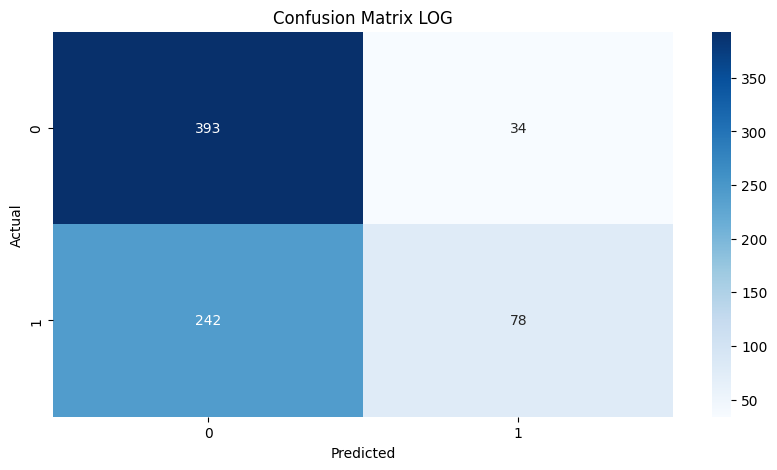

In [ ]:
conf_matrix_lr = confusion_matrix(y_test, y_pred)

print(f'Accuracy LOG: {accuracy_lr}')
print('Classification Report LOG:\n', report_lr)
print('Confusion Matrix LOG:\n', conf_matrix_lr)

conf_matrix_lr = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix_lr, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix LOG')
plt.show()

## KNN



In [ ]:
X = df[["attention", "meditation", "delta", "theta", "lowAlpha", "highAlpha", "lowBeta", "highBeta", "lowGamma", "highGamma"]]
y = df['classification']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
kn_classifier = KNeighborsClassifier()
kn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_kn_pred = kn_classifier.predict(X_test)

In [ ]:
accuracy_kn = accuracy_score(y_test, y_kn_pred)

In [ ]:
report_kn = classification_report(y_test, y_kn_pred)

In [ ]:
Scores_kn = {'Accuracy':round(accuracy_score(y_test, y_kn_pred),3),
          'F1_score':round(f1_score(y_test, y_kn_pred),3),
          'Recall':round(recall_score(y_test, y_kn_pred),3),
          'Precision':round(precision_score(y_test, y_kn_pred),3)}
df_kn=pd.DataFrame(data=Scores_kn,index=['KNN'])
df_kn

Accuracy  F1_score  Recall  Precision
KNN     0.708     0.664   0.696      0.634

Accuracy KNN: 0.7081659973226239
Classification Report KNN:
               precision    recall  f1-score   support

           0       0.77      0.72      0.74       438
           1       0.63      0.70      0.66       309

    accuracy                           0.71       747
   macro avg       0.70      0.71      0.70       747
weighted avg       0.71      0.71      0.71       747

Confusion Matrix KNN:
 [[314 124]
 [ 94 215]]


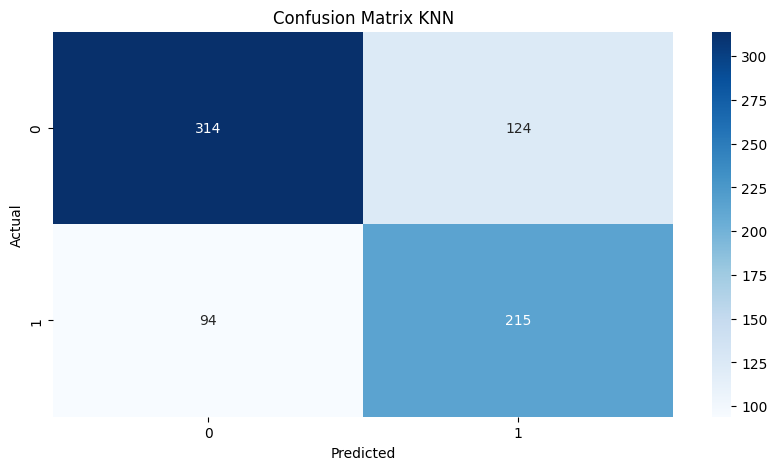

In [ ]:
conf_matrix_kn = confusion_matrix(y_test, y_kn_pred)

print(f'Accuracy KNN: {accuracy_kn}')
print('Classification Report KNN:\n', report_kn)
print('Confusion Matrix KNN:\n', conf_matrix_kn)

sns.heatmap(conf_matrix_kn, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix KNN')
plt.show()

In [ ]:
#krzywa walidacji krzyżowej i KNN

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier(n_neighbors=3)

scores = cross_val_score(knn_classifier, X_train, y_train, cv = 15)
scores

array([0.69      , 0.73      , 0.715     , 0.66331658, 0.75376884,
       0.72361809, 0.69346734, 0.66834171, 0.69346734, 0.69849246,
       0.68844221, 0.67839196, 0.69849246, 0.70351759, 0.70854271])

In [ ]:
print(f'Accuracy: {scores.mean():.4f} (+/- {scores.std():.4f})')

Accuracy: 0.7005 (+/- 0.0228)


In [ ]:
scores_df = pd.DataFrame({'Accuracy': scores})

In [ ]:
fig = px.bar(scores_df, y='Accuracy', color='Accuracy', width=700, height=400,
       title=f'Walidacja krzyżowa (15 podziałów) | Accuracy: {scores.mean():.4f} (+/- {scores.std():.4f})',
       color_continuous_scale=px.colors.sequential.Inferno_r, range_color=[scores.min() - 0.01, 1.0])

fig.show()

## Drzewo decyzyjne

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from mlxtend import plotting

d_tree = DecisionTreeClassifier(random_state=42, max_depth=3,criterion='gini').fit(X_train, y_train)

[Text(0.5, 0.875, 'x[2] <= 32716.0\ngini = 0.491\nsamples = 2988\nvalue = [1697, 1291]'),
 Text(0.25, 0.625, 'x[9] <= 176835.5\ngini = 0.357\nsamples = 478\nvalue = [111, 367]'),
 Text(0.125, 0.375, 'x[9] <= 8778.5\ngini = 0.3\nsamples = 436\nvalue = [80, 356]'),
 Text(0.0625, 0.125, 'gini = 0.468\nsamples = 107\nvalue = [40, 67]'),
 Text(0.1875, 0.125, 'gini = 0.214\nsamples = 329\nvalue = [40, 289]'),
 Text(0.375, 0.375, 'x[9] <= 531178.5\ngini = 0.387\nsamples = 42\nvalue = [31, 11]'),
 Text(0.3125, 0.125, 'gini = 0.061\nsamples = 32\nvalue = [31, 1]'),
 Text(0.4375, 0.125, 'gini = 0.0\nsamples = 10\nvalue = [0, 10]'),
 Text(0.75, 0.625, 'x[7] <= 16445.5\ngini = 0.465\nsamples = 2510\nvalue = [1586, 924]'),
 Text(0.625, 0.375, 'x[9] <= 577638.0\ngini = 0.493\nsamples = 1652\nvalue = [921, 731]'),
 Text(0.5625, 0.125, 'gini = 0.475\nsamples = 1485\nvalue = [909, 576]'),
 Text(0.6875, 0.125, 'gini = 0.133\nsamples = 167\nvalue = [12, 155]'),
 Text(0.875, 0.375, 'x[7] <= 54565.5\ngini 

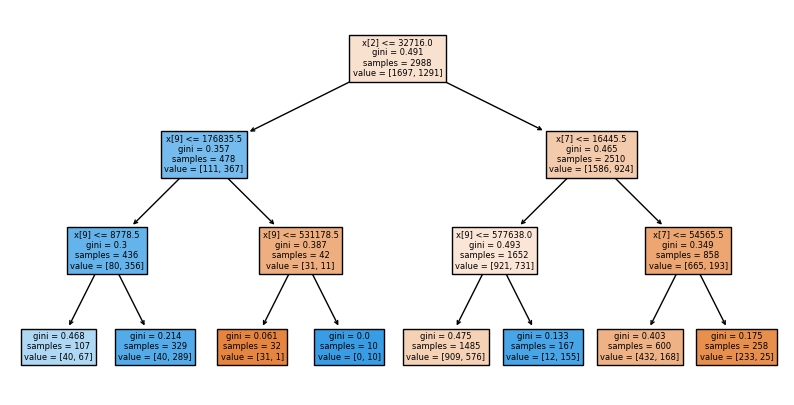

In [ ]:
plot_tree(d_tree,filled=True)

In [ ]:
d_tree.feature_importances_

array([0.        , 0.        , 0.3891673 , 0.        , 0.        ,
       0.        , 0.        , 0.198883  , 0.        , 0.41194971])

In [ ]:
y_pred_tree = d_tree.predict(X_test)

In [ ]:
accuracy_tree = accuracy_score(y_test, y_pred_tree)

In [ ]:
report_tree = classification_report(y_test, y_pred_tree)

In [ ]:
Scores_tree = {'Accuracy':round(accuracy_score(y_test, y_pred_tree),3),
          'F1_score':round(f1_score(y_test, y_pred_tree),3),
          'Recall':round(recall_score(y_test, y_pred_tree),3),
          'Precision':round(precision_score(y_test, y_pred_tree),3)}
df_tree=pd.DataFrame(data=Scores_tree,index=['DecisionTree'])
df_tree

Accuracy  F1_score  Recall  Precision
DecisionTree     0.711     0.528   0.392      0.812

Accuracy TREE: 0.7108433734939759
Classification Report TREE:
               precision    recall  f1-score   support

           0       0.69      0.94      0.79       438
           1       0.81      0.39      0.53       309

    accuracy                           0.71       747
   macro avg       0.75      0.66      0.66       747
weighted avg       0.74      0.71      0.68       747

Confusion Matrix TREE:
 [[410  28]
 [188 121]]


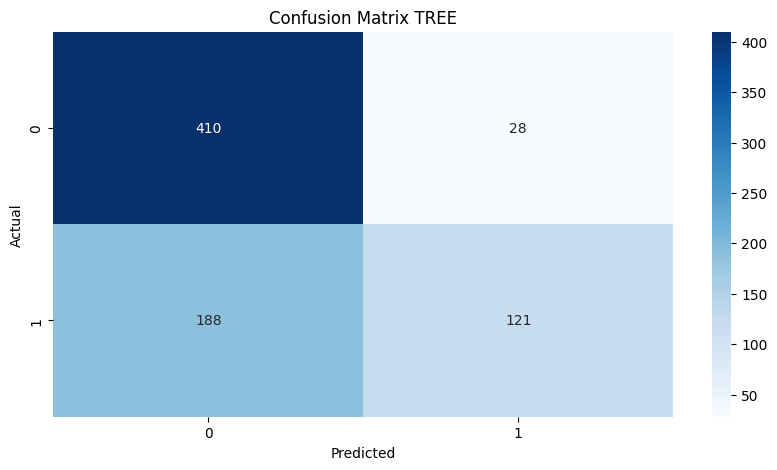

In [ ]:
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)

print(f'Accuracy TREE: {accuracy_tree}')
print('Classification Report TREE:\n', report_tree)
print('Confusion Matrix TREE:\n', conf_matrix_tree)

sns.heatmap(conf_matrix_tree, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix TREE')
plt.show()

## RANDOM FOREST

In [ ]:
from sklearn.model_selection import GridSearchCV

X = df[["attention", "meditation", "delta", "theta", "lowAlpha", "highAlpha", "lowBeta", "highBeta", "lowGamma", "highGamma"]]
y = df['classification']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

param_grid = {'n_estimators': [50, 100, 150],
              'max_depth': [3, 9, 15],
              'min_samples_leaf':[5, 15, 45],
              'min_samples_split': [5, 15, 45],
              'criterion': ['entropy']}

grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=10)
grid.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy'], 'max_depth': [3, 9, 15],
                         'min_samples_leaf': [5, 15, 45],
                         'min_samples_split': [5, 15, 45],
                         'n_estimators': [50, 100, 150]})

In [ ]:
print(grid.best_params_)

{'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 100}


In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100,min_samples_split=5,min_samples_leaf=5,
                                       max_depth=15,criterion="gini")

rf_classifier = rf_classifier.fit(X_train, y_train)

y_rf_pred = rf_classifier.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_rf_pred)

report_rf = classification_report(y_test, y_rf_pred)

Scores_rf = {'Accuracy':round(accuracy_score(y_test, y_rf_pred),3),
          'F1_score':round(f1_score(y_test, y_rf_pred),3),
          'Recall':round(recall_score(y_test, y_rf_pred),3),
          'Precision':round(precision_score(y_test, y_rf_pred),3)}
df_rf=pd.DataFrame(data=Scores_rf,index=['RandomForest'])
df_rf

Accuracy  F1_score  Recall  Precision
RandomForest     0.793     0.739   0.712      0.769

Accuracy RF: 0.7925033467202142
Classification Report RF:
               precision    recall  f1-score   support

           0       0.81      0.85      0.83       438
           1       0.77      0.71      0.74       309

    accuracy                           0.79       747
   macro avg       0.79      0.78      0.78       747
weighted avg       0.79      0.79      0.79       747

Confusion Matrix RF:
 [[372  66]
 [ 89 220]]


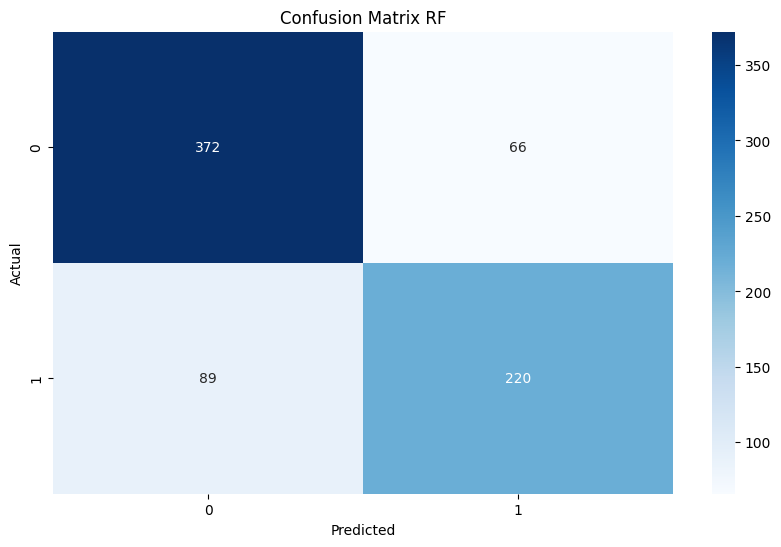

In [ ]:
conf_matrix_rf = confusion_matrix(y_test, y_rf_pred)

print(f'Accuracy RF: {accuracy_rf}')
print('Classification Report RF:\n', report_rf)
print('Confusion Matrix RF:\n', conf_matrix_rf)

sns.heatmap(conf_matrix_rf, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix RF')
plt.show()

In [ ]:
y_rf_pred = rf_classifier.predict(X_train)

accuracy_rf = accuracy_score(y_train, y_rf_pred)

report_rf = classification_report(y_train, y_rf_pred)

Scores_rf = {'Accuracy':round(accuracy_score(y_train, y_rf_pred),3),
          'F1_score':round(f1_score(y_train, y_rf_pred),3),
          'Recall':round(recall_score(y_train, y_rf_pred),3),
          'Precision':round(precision_score(y_train, y_rf_pred),3)}
df_rf=pd.DataFrame(data=Scores_rf,index=['RandomForest'])
df_rf

Accuracy  F1_score  Recall  Precision
RandomForest     0.942     0.931     0.9      0.964

Accuracy RF: 0.9421017402945113
Classification Report RF:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      1697
           1       0.96      0.90      0.93      1291

    accuracy                           0.94      2988
   macro avg       0.95      0.94      0.94      2988
weighted avg       0.94      0.94      0.94      2988

Confusion Matrix RF:
 [[1653   44]
 [ 129 1162]]


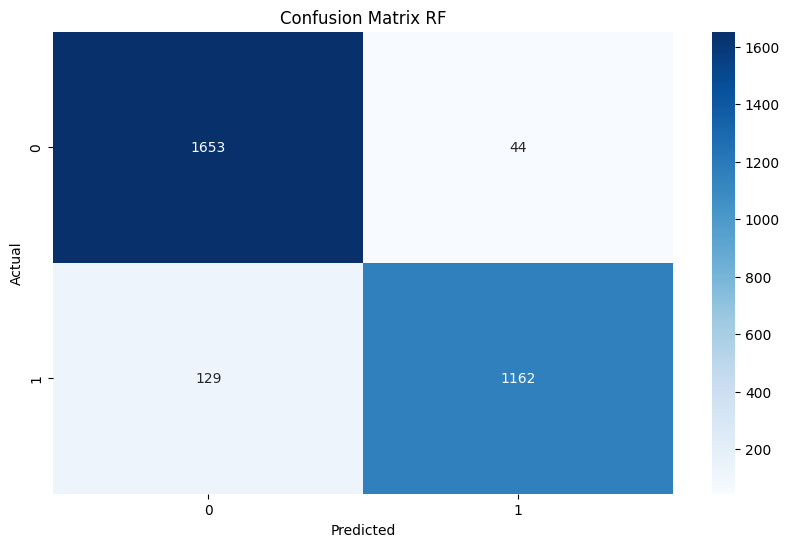

In [ ]:
conf_matrix_rf = confusion_matrix(y_train, y_rf_pred)

print(f'Accuracy RF: {accuracy_rf}')
print('Classification Report RF:\n', report_rf)
print('Confusion Matrix RF:\n', conf_matrix_rf)

sns.heatmap(conf_matrix_rf, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix RF')
plt.show()

## ROC

In [ ]:
fpr_train

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 5.89275192e-04,
       5.89275192e-04, 1.17855038e-03, 1.17855038e-03, 1.76782557e-03,
       1.76782557e-03, 2.35710077e-03, 2.35710077e-03, 2.94637596e-03,
       2.94637596e-03, 3.53565115e-03, 3.53565115e-03, 4.12492634e-03,
       4.12492634e-03, 4.71420153e-03, 4.71420153e-03, 5.30347672e-03,
       5.30347672e-03, 5.89275192e-03, 5.89275192e-03, 6.48202711e-03,
       6.48202711e-03, 7.07130230e-03, 7.07130230e-03, 7.66057749e-03,
       7.66057749e-03, 8.24985268e-03, 8.24985268e-03, 8.83912787e-03,
       8.83912787e-03, 9.42840306e-03, 9.42840306e-03, 1.06069534e-02,
       1.06069534e-02, 1.11962286e-02, 1.11962286e-02, 1.17855038e-02,
       1.17855038e-02, 1.23747790e-02, 1.23747790e-02, 1.29640542e-02,
       1.29640542e-02, 1.41426046e-02, 1.41426046e-02, 1.47318798e-02,
       1.47318798e-02, 1.53211550e-02, 1.53211550e-02, 1.59104302e-02,
       1.59104302e-02, 1.64997054e-02, 1.64997054e-02, 1.70889806e-02,
      

In [ ]:
tpr_train

array([0.00000000e+00, 7.74593338e-04, 5.21301317e-01, 5.21301317e-01,
       5.39891557e-01, 5.39891557e-01, 5.87916344e-01, 5.87916344e-01,
       6.01859024e-01, 6.01859024e-01, 6.32068164e-01, 6.32068164e-01,
       7.18048025e-01, 7.18048025e-01, 7.31990705e-01, 7.31990705e-01,
       7.62199845e-01, 7.62199845e-01, 7.69945778e-01, 7.69945778e-01,
       7.71494965e-01, 7.71494965e-01, 7.86986832e-01, 7.86986832e-01,
       8.13323005e-01, 8.13323005e-01, 8.17195972e-01, 8.17195972e-01,
       8.21068939e-01, 8.21068939e-01, 8.31138652e-01, 8.31138652e-01,
       8.38884586e-01, 8.38884586e-01, 8.39659179e-01, 8.39659179e-01,
       8.41208366e-01, 8.41208366e-01, 8.46630519e-01, 8.46630519e-01,
       8.47405112e-01, 8.47405112e-01, 8.48954299e-01, 8.48954299e-01,
       8.49728892e-01, 8.49728892e-01, 8.54376452e-01, 8.54376452e-01,
       8.56700232e-01, 8.56700232e-01, 8.57474826e-01, 8.57474826e-01,
       8.59798606e-01, 8.59798606e-01, 8.68319132e-01, 8.68319132e-01,
      

0.9902876858830022
0.874421835054898


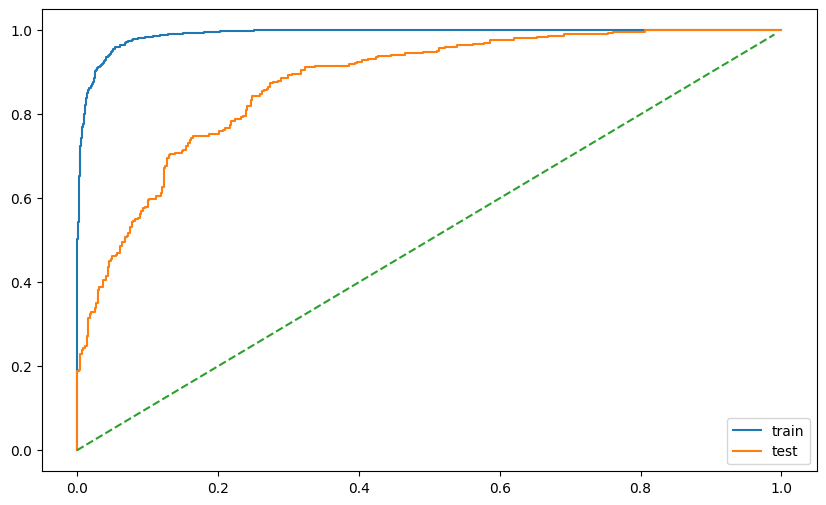

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

pred_train_proba = rf_classifier.predict_proba(X_train)[:,1]
pred_test_proba = rf_classifier.predict_proba(X_test)[:,1]

print(roc_auc_score(y_train,pred_train_proba))
print(roc_auc_score(y_test,pred_test_proba))

fpr_train, tpr_train, thresholds =roc_curve(y_train, pred_train_proba)
fpr_test, tpr_test, thresholds_test =roc_curve(y_test, pred_test_proba)

plt.rcParams["figure.figsize"] = (10,6)
plt.plot(fpr_train,tpr_train, label='train')
plt.plot(fpr_test,tpr_test,label='test')
plt.plot(np.arange(0,1,0.01),np.arange(0,1,0.01),'--')
plt.legend()
plt.show()

In [ ]:
#leaf
tree_train_scores, rf_train_scores, tree_test_scores, rf_test_scores = [], [], [], []

for i in range(2,50,1):
    tree_1_classifier = DecisionTreeClassifier(max_leaf_nodes=i).fit(X_train,y_train)
    tree_train_scores.append(tree_1_classifier.score(X_train,y_train))
    tree_test_scores.append(tree_1_classifier.score(X_test,y_test))

    rf_1_classifier = RandomForestClassifier(max_leaf_nodes=i, n_estimators=50).fit(X_train,y_train)
    rf_train_scores.append(rf_1_classifier.score(X_train,y_train))
    rf_test_scores.append(rf_1_classifier.score(X_test,y_test))

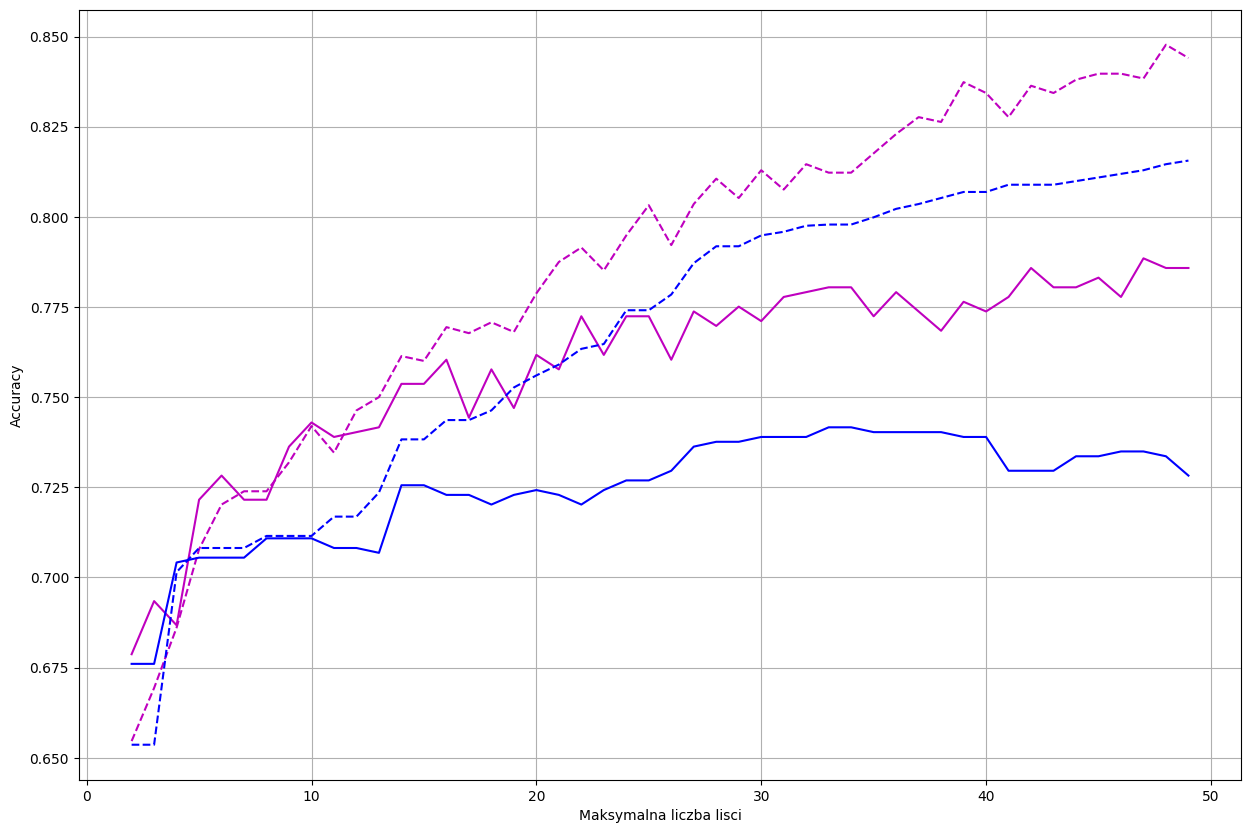

In [ ]:
plt.figure(figsize=(15,10))
plt.xlabel('Maksymalna liczba lisci')
plt.ylabel('Accuracy')

plt.plot(range(2,50,1), rf_train_scores,'m--')
plt.plot(range(2,50,1), rf_test_scores, 'm')
plt.plot(range(2,50,1), tree_train_scores, 'b--')
plt.plot(range(2,50,1), tree_test_scores, 'b')
plt.grid()
plt.show()

In [ ]:
#max_deph

tree_train_scores, rf_train_scores, tree_test_scores, rf_test_scores = [], [], [], []

for i in range(2,15,1):
    tree_1_classifier = DecisionTreeClassifier(max_depth=i).fit(X_train,y_train)
    tree_train_scores.append(tree_1_classifier.score(X_train,y_train))
    tree_test_scores.append(tree_1_classifier.score(X_test,y_test))

    rf_1_classifier = RandomForestClassifier(max_depth=i, n_estimators=50).fit(X_train,y_train)
    rf_train_scores.append(rf_1_classifier.score(X_train,y_train))
    rf_test_scores.append(rf_1_classifier.score(X_test,y_test))

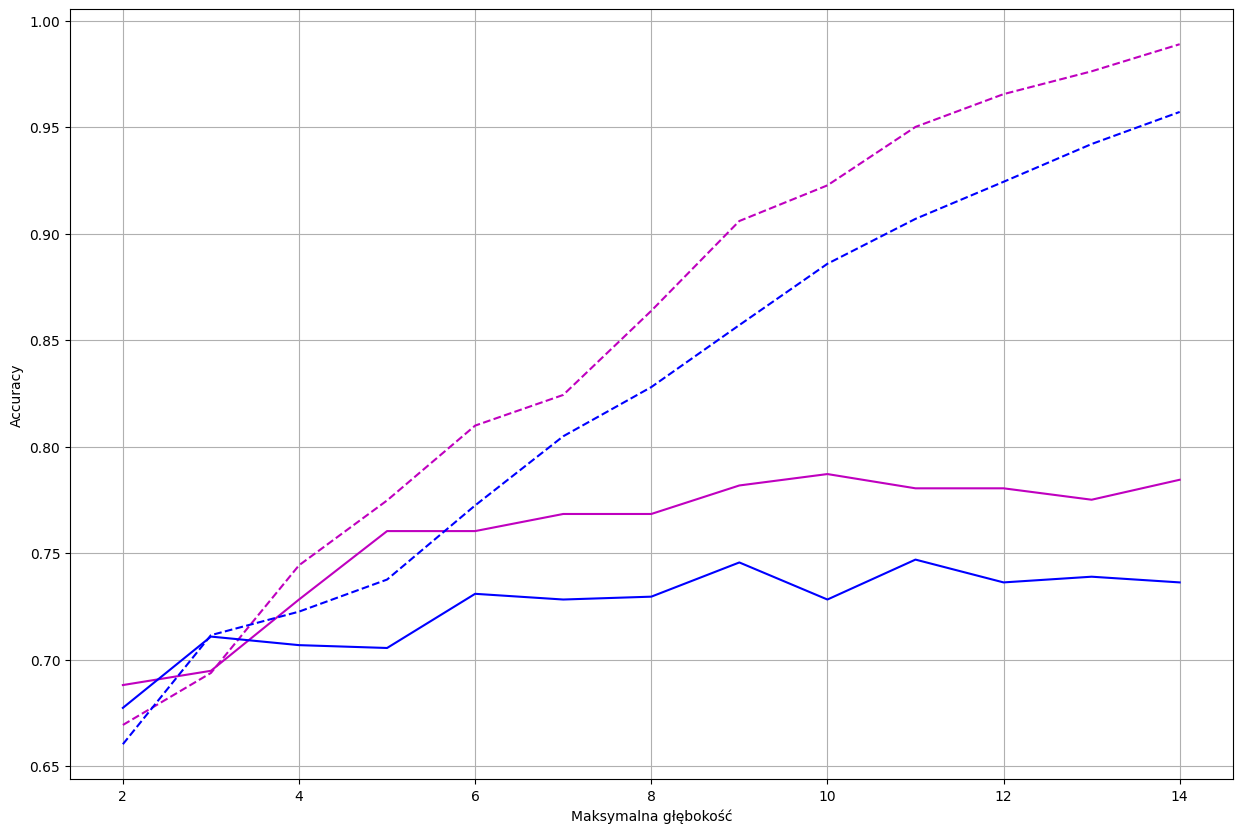

In [ ]:
plt.figure(figsize=(15,10))
plt.xlabel('Maksymalna głębokość')
plt.ylabel('Accuracy')

plt.plot(range(2,15,1), rf_train_scores,'m--')
plt.plot(range(2,15,1), rf_test_scores, 'm')
plt.plot(range(2,15,1), tree_train_scores, 'b--')
plt.plot(range(2,15,1), tree_test_scores, 'b')
plt.grid()
plt.show()

In [ ]:
model = RandomForestClassifier()

param_grid = {
    'max_depth': [5, 10, 15, 20, 30, 40],
    'min_samples_leaf': [1, 2, 4, 6],
    'min_samples_split': [2, 4, 6]
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', verbose=1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print('Najlepsze parametry: ', best_params)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Najlepsze parametry:  {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 4}


In [ ]:
brf_classifier = grid_search.best_estimator_

In [ ]:
brf_classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=2, min_samples_split=4)

In [ ]:
y_brf_pred = brf_classifier.predict(X_test)

In [ ]:
accuracy_brf = accuracy_score(y_test, y_brf_pred)

In [ ]:
report_brf = classification_report(y_test, y_brf_pred)

Accuracy BRF: 0.7898259705488622
Classification Report BRF:
               precision    recall  f1-score   support

           0       0.81      0.84      0.82       438
           1       0.76      0.73      0.74       309

    accuracy                           0.79       747
   macro avg       0.79      0.78      0.78       747
weighted avg       0.79      0.79      0.79       747

Confusion Matrix BRF:
 [[366  72]
 [ 84 225]]


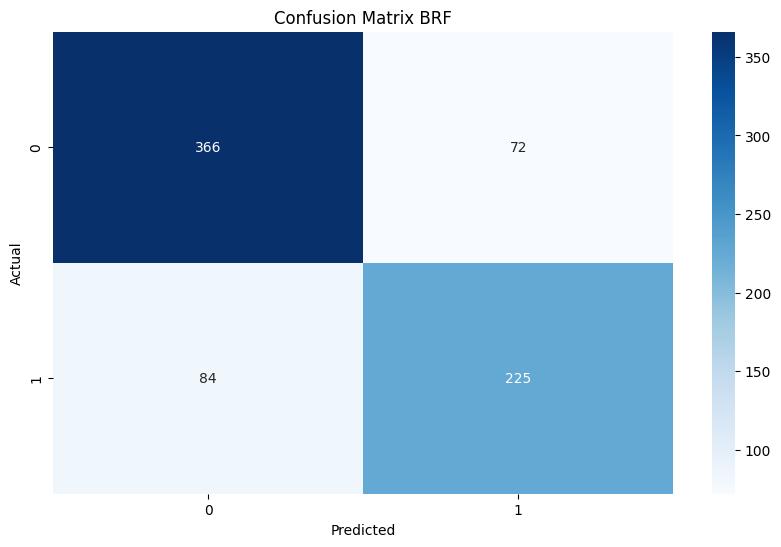

In [ ]:
conf_matrix_brf = confusion_matrix(y_test, y_brf_pred)

print(f'Accuracy BRF: {accuracy_rf}')
print('Classification Report BRF:\n', report_brf)
print('Confusion Matrix BRF:\n', conf_matrix_brf)

sns.heatmap(conf_matrix_brf, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix BRF')
plt.show()

## ADA BOOST

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV

tree = RandomForestClassifier(max_depth = 10)
clf = AdaBoostClassifier(tree)
params = {
    'n_estimators' : [2,5,10,15,20],
    'learning_rate' : [0.01,0.1,1,10]
}
random_search = RandomizedSearchCV(clf, params, n_iter = 10, cv = 5)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=AdaBoostClassifier(estimator=RandomForestClassifier(max_depth=10)),
                   param_distributions={'learning_rate': [0.01, 0.1, 1, 10],
                                        'n_estimators': [2, 5, 10, 15, 20]})

In [ ]:
random_search.best_params_

{'n_estimators': 5, 'learning_rate': 1}

In [ ]:
ada_classifier = AdaBoostClassifier(n_estimators = 15, learning_rate = 1)

In [ ]:
ada_classifier.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=1, n_estimators=15)

In [ ]:
y_ada_pred = ada_classifier.predict(X_test)

In [ ]:
accuracy_ada = accuracy_score(y_test, y_ada_pred)

In [ ]:
report_ada = classification_report(y_test, y_ada_pred)

Accuracy ADA: 0.7028112449799196
Classification Report ADA:
               precision    recall  f1-score   support

           0       0.69      0.89      0.78       438
           1       0.74      0.43      0.55       309

    accuracy                           0.70       747
   macro avg       0.72      0.66      0.66       747
weighted avg       0.71      0.70      0.68       747

Confusion Matrix ADA:
 [[392  46]
 [176 133]]


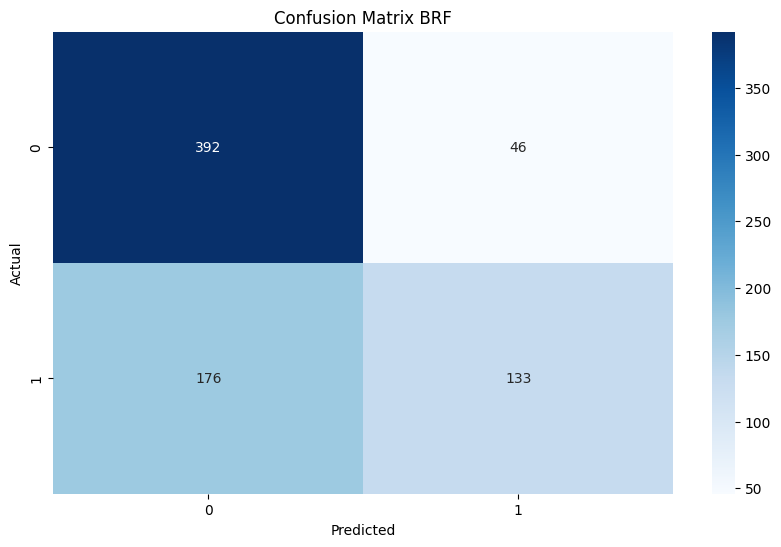

In [ ]:
conf_matrix_ada = confusion_matrix(y_test, y_ada_pred)

print(f'Accuracy ADA: {accuracy_ada}')
print('Classification Report ADA:\n', report_ada)
print('Confusion Matrix ADA:\n', conf_matrix_ada)

sns.heatmap(conf_matrix_ada, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix BRF')
plt.show()

## SVM

In [ ]:
X = df[["attention", "meditation", "delta", "theta", "lowAlpha", "highAlpha", "lowBeta", "highBeta", "lowGamma", "highGamma"]]
y = df['classification']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [ ]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.svm import SVC

svm_classifier = SVC(C=1.0, kernel='rbf')

svm_classifier.fit(X_train, y_train)

SVC()

In [ ]:
y_svm_pred = svm_classifier.predict(X_test)

In [ ]:
svm_classifier.score(X_test, y_test)

0.7402945113788487

In [ ]:
accuracy_svm = accuracy_score(y_test, y_svm_pred)

In [ ]:
report_svm = classification_report(y_test, y_svm_pred)

In [ ]:
Scores_svm = {'Accuracy':round(accuracy_score(y_test, y_svm_pred),3),
          'F1_score':round(f1_score(y_test, y_svm_pred),3),
          'Recall':round(recall_score(y_test, y_svm_pred),3),
          'Precision':round(precision_score(y_test, y_svm_pred),3)}
df_svm=pd.DataFrame(data=Scores_svm,index=['SVM'])
df_svm

Accuracy  F1_score  Recall  Precision
SVM      0.74     0.713    0.78      0.657

Accuracy SVM: 0.7402945113788487
Classification Report SVM:
               precision    recall  f1-score   support

           0       0.82      0.71      0.76       438
           1       0.66      0.78      0.71       309

    accuracy                           0.74       747
   macro avg       0.74      0.75      0.74       747
weighted avg       0.75      0.74      0.74       747

Confusion Matrix SVM:
 [[312 126]
 [ 68 241]]


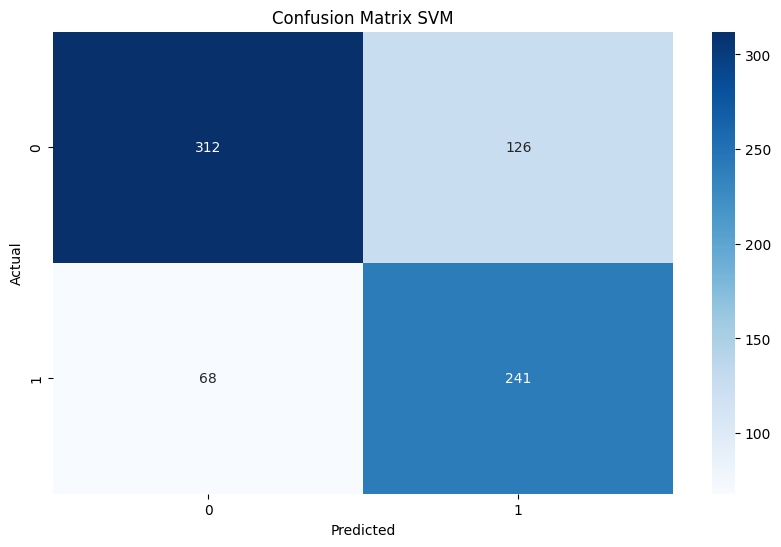

Accuracy  F1_score  Recall  Precision
SVM      0.74     0.713    0.78      0.657

In [ ]:
conf_matrix_svm = confusion_matrix(y_test, y_svm_pred)

print(f'Accuracy SVM: {accuracy_svm}')
print('Classification Report SVM:\n', report_svm)
print('Confusion Matrix SVM:\n', conf_matrix_svm)

sns.heatmap(conf_matrix_svm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix SVM')
plt.show()
df_rf=pd.DataFrame(data=Scores_svm,index=['SVM'])
df_rf

## GRID SEACH

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'gamma':['scale', 'auto'],
              'kernel': ['linear', 'rbf']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3,n_jobs=-1)

In [ ]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']},
             verbose=3)

In [ ]:
grid.best_params_

{'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}

In [ ]:
svm_1_classifier = SVC(C=100, gamma='scale', kernel='rbf')

In [ ]:
svm_1_classifier.fit(X_train, y_train)

SVC(C=100)

In [ ]:
y_svm_1_pred = svm_1_classifier.predict(X_test)

In [ ]:
accuracy_svm_1 = accuracy_score(y_test, y_svm_1_pred)

In [ ]:
report_svm_1 = classification_report(y_test, y_svm_1_pred)

Accuracy SVM: 0.7028112449799196
Classification Report SVM:
               precision    recall  f1-score   support

           0       0.69      0.89      0.78       438
           1       0.74      0.43      0.55       309

    accuracy                           0.70       747
   macro avg       0.72      0.66      0.66       747
weighted avg       0.71      0.70      0.68       747

Confusion Matrix SVM:
 [[392  46]
 [176 133]]


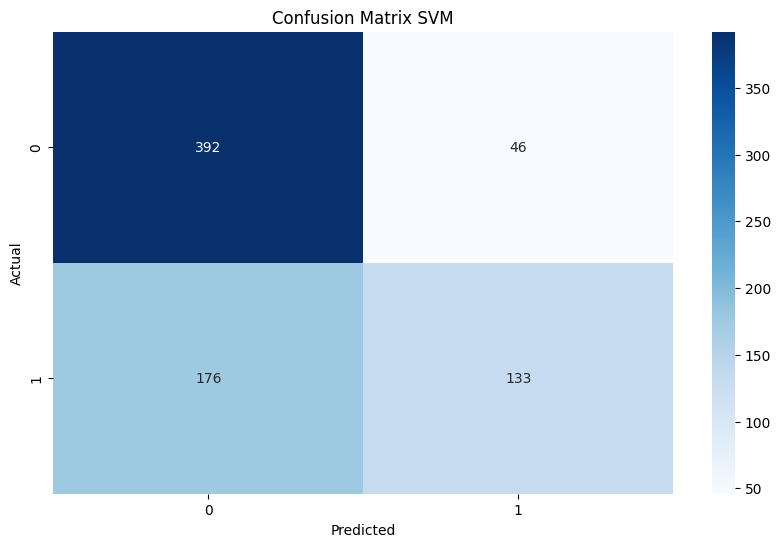

In [ ]:
conf_matrix_svm_1 = confusion_matrix(y_test, y_svm_1_pred)

print(f'Accuracy SVM: {accuracy_ada}')
print('Classification Report SVM:\n', report_ada)
print('Confusion Matrix SVM:\n', conf_matrix_ada)

sns.heatmap(conf_matrix_ada, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix SVM')
plt.show()

## Podsumowanie

In [ ]:
result = pd.concat([df_lr,df_kn, df_tree, df_rf, df_svm])
result

Accuracy  F1_score  Recall  Precision
LogisticRegression     0.700     0.643   0.654      0.633
KNN                    0.708     0.664   0.696      0.634
DecisionTree           0.711     0.528   0.392      0.812
SVM                    0.740     0.713   0.780      0.657
SVM                    0.740     0.713   0.780      0.657

In [ ]:
print("Projekt końcowy")

Projekt końcowy
